<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/BI0002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha':0.25, 's':80, 'linewidths':0}

In [2]:
!wget https://raw.githubusercontent.com/scikit-learn-contrib/hdbscan/master/notebooks/clusterable_data.npy

--2023-06-08 16:07:03--  https://raw.githubusercontent.com/scikit-learn-contrib/hdbscan/master/notebooks/clusterable_data.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37024 (36K) [application/octet-stream]
Saving to: ‘clusterable_data.npy.3’

clusterable_data.np 100%[===================>]  36.16K  --.-KB/s    in 0.002s  

2023-06-08 16:07:03 (14.4 MB/s) - ‘clusterable_data.npy.3’ saved [37024/37024]



In [3]:
data = np.load('clusterable_data.npy')

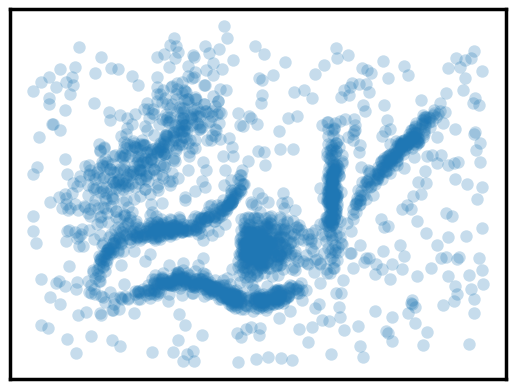

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(data.T[0], data.T[1], **plot_kwds)
ax.set_xticks([])
ax.set_yticks([]);

In [5]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


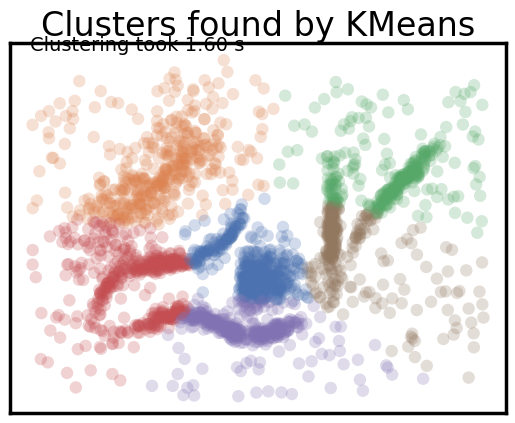

In [6]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

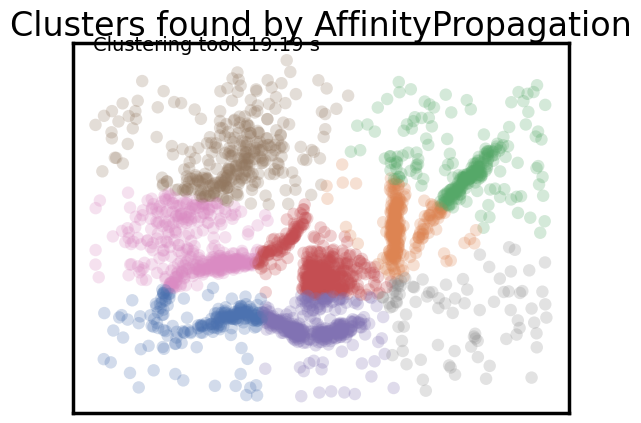

In [7]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

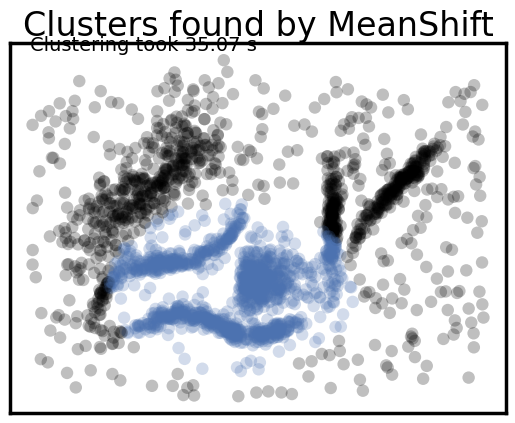

In [8]:
plot_clusters(data, cluster.MeanShift, (), {'cluster_all':False})

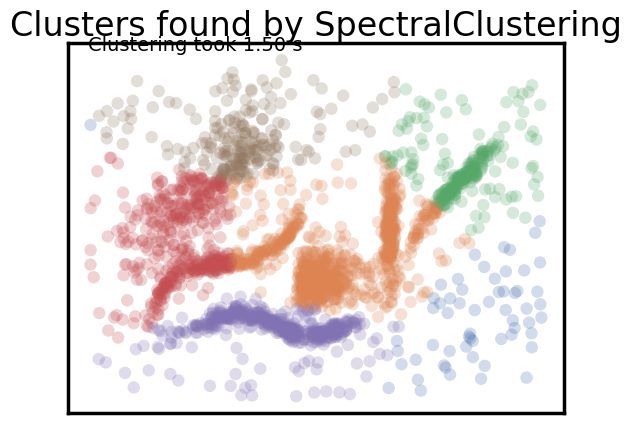

In [9]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})

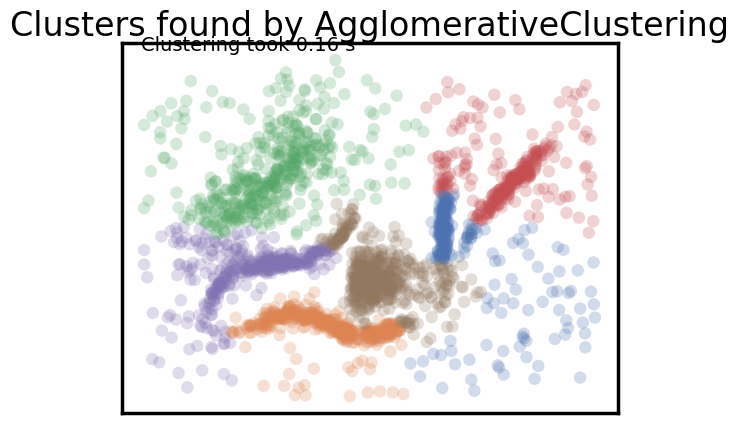

In [10]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

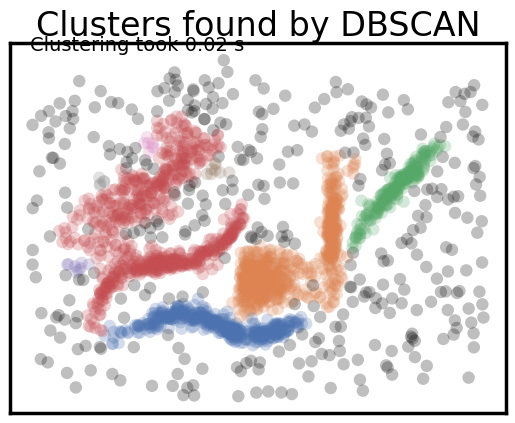

In [11]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

In [12]:
!pip install hdbscan
import hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


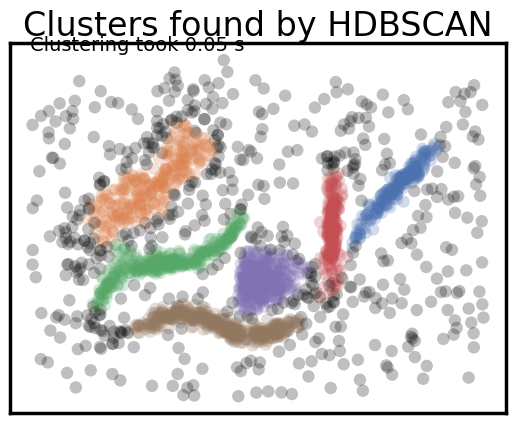

In [13]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})

In [14]:
!wget https://raw.githubusercontent.com/Yangzhehan/Cluster-analysis-of-automotive-products/main/car_price.csv

--2023-06-08 16:08:07--  https://raw.githubusercontent.com/Yangzhehan/Cluster-analysis-of-automotive-products/main/car_price.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26717 (26K) [text/plain]
Saving to: ‘car_price.csv.2’

car_price.csv.2     100%[===================>]  26.09K  --.-KB/s    in 0.001s  

2023-06-08 16:08:07 (23.8 MB/s) - ‘car_price.csv.2’ saved [26717/26717]



In [15]:
#import base64

#car_price_data_path = 'car_price.csv'
#with open(car_price_data_path, "rb") as binary_file:
#    binary_file_data = binary_file.read()
#    base64_encoded_data = base64.b64encode(binary_file_data)
#    base64_message = base64_encoded_data.decode('utf-8')
#
#    encodedMdl_bytes = base64_message
#    print(encodedMdl_bytes)

In [16]:
import base64

encodedMdl=r'Y2FyX0lELHN5bWJvbGluZyxDYXJOYW1lLGZ1ZWx0eXBlLGFzcGlyYXRpb24sZG9vcm51bWJlcixjYXJib2R5LGRyaXZld2hlZWwsZW5naW5lbG9jYXRpb24sd2hlZWxiYXNlLGNhcmxlbmd0aCxjYXJ3aWR0aCxjYXJoZWlnaHQsY3VyYndlaWdodCxlbmdpbmV0eXBlLGN5bGluZGVybnVtYmVyLGVuZ2luZXNpemUsZnVlbHN5c3RlbSxib3JlcmF0aW8sc3Ryb2tlLGNvbXByZXNzaW9ucmF0aW8saG9yc2Vwb3dlcixwZWFrcnBtLGNpdHltcGcsaGlnaHdheW1wZyxwcmljZQ0KMSwzLGFsZmEtcm9tZXJvIGdpdWxpYSxnYXMsc3RkLHR3byxjb252ZXJ0aWJsZSxyd2QsZnJvbnQsODguNiwxNjguOCw2NC4xLDQ4LjgsMjU0OCxkb2hjLGZvdXIsMTMwLG1wZmksMy40NywyLjY4LDksMTExLDUwMDAsMjEsMjcsMTM0OTUNCjIsMyxhbGZhLXJvbWVybyBzdGVsdmlvLGdhcyxzdGQsdHdvLGNvbnZlcnRpYmxlLHJ3ZCxmcm9udCw4OC42LDE2OC44LDY0LjEsNDguOCwyNTQ4LGRvaGMsZm91ciwxMzAsbXBmaSwzLjQ3LDIuNjgsOSwxMTEsNTAwMCwyMSwyNywxNjUwMA0KMywxLGFsZmEtcm9tZXJvIFF1YWRyaWZvZ2xpbyxnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDk0LjUsMTcxLjIsNjUuNSw1Mi40LDI4MjMsb2hjdixzaXgsMTUyLG1wZmksMi42OCwzLjQ3LDksMTU0LDUwMDAsMTksMjYsMTY1MDANCjQsMixhdWRpIDEwMCBscyxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk5LjgsMTc2LjYsNjYuMiw1NC4zLDIzMzcsb2hjLGZvdXIsMTA5LG1wZmksMy4xOSwzLjQsMTAsMTAyLDU1MDAsMjQsMzAsMTM5NTANCjUsMixhdWRpIDEwMGxzLGdhcyxzdGQsZm91cixzZWRhbiw0d2QsZnJvbnQsOTkuNCwxNzYuNiw2Ni40LDU0LjMsMjgyNCxvaGMsZml2ZSwxMzYsbXBmaSwzLjE5LDMuNCw4LDExNSw1NTAwLDE4LDIyLDE3NDUwDQo2LDIsYXVkaSBmb3gsZ2FzLHN0ZCx0d28sc2VkYW4sZndkLGZyb250LDk5LjgsMTc3LjMsNjYuMyw1My4xLDI1MDcsb2hjLGZpdmUsMTM2LG1wZmksMy4xOSwzLjQsOC41LDExMCw1NTAwLDE5LDI1LDE1MjUwDQo3LDEsYXVkaSAxMDBscyxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDEwNS44LDE5Mi43LDcxLjQsNTUuNywyODQ0LG9oYyxmaXZlLDEzNixtcGZpLDMuMTksMy40LDguNSwxMTAsNTUwMCwxOSwyNSwxNzcxMA0KOCwxLGF1ZGkgNTAwMCxnYXMsc3RkLGZvdXIsd2Fnb24sZndkLGZyb250LDEwNS44LDE5Mi43LDcxLjQsNTUuNywyOTU0LG9oYyxmaXZlLDEzNixtcGZpLDMuMTksMy40LDguNSwxMTAsNTUwMCwxOSwyNSwxODkyMA0KOSwxLGF1ZGkgNDAwMCxnYXMsdHVyYm8sZm91cixzZWRhbixmd2QsZnJvbnQsMTA1LjgsMTkyLjcsNzEuNCw1NS45LDMwODYsb2hjLGZpdmUsMTMxLG1wZmksMy4xMywzLjQsOC4zLDE0MCw1NTAwLDE3LDIwLDIzODc1DQoxMCwwLGF1ZGkgNTAwMHMgKGRpZXNlbCksZ2FzLHR1cmJvLHR3byxoYXRjaGJhY2ssNHdkLGZyb250LDk5LjUsMTc4LjIsNjcuOSw1MiwzMDUzLG9oYyxmaXZlLDEzMSxtcGZpLDMuMTMsMy40LDcsMTYwLDU1MDAsMTYsMjIsMTc4NTkuMTY3DQoxMSwyLGJtdyAzMjBpLGdhcyxzdGQsdHdvLHNlZGFuLHJ3ZCxmcm9udCwxMDEuMiwxNzYuOCw2NC44LDU0LjMsMjM5NSxvaGMsZm91ciwxMDgsbXBmaSwzLjUsMi44LDguOCwxMDEsNTgwMCwyMywyOSwxNjQzMA0KMTIsMCxibXcgMzIwaSxnYXMsc3RkLGZvdXIsc2VkYW4scndkLGZyb250LDEwMS4yLDE3Ni44LDY0LjgsNTQuMywyMzk1LG9oYyxmb3VyLDEwOCxtcGZpLDMuNSwyLjgsOC44LDEwMSw1ODAwLDIzLDI5LDE2OTI1DQoxMywwLGJtdyB4MSxnYXMsc3RkLHR3byxzZWRhbixyd2QsZnJvbnQsMTAxLjIsMTc2LjgsNjQuOCw1NC4zLDI3MTAsb2hjLHNpeCwxNjQsbXBmaSwzLjMxLDMuMTksOSwxMjEsNDI1MCwyMSwyOCwyMDk3MA0KMTQsMCxibXcgeDMsZ2FzLHN0ZCxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMDEuMiwxNzYuOCw2NC44LDU0LjMsMjc2NSxvaGMsc2l4LDE2NCxtcGZpLDMuMzEsMy4xOSw5LDEyMSw0MjUwLDIxLDI4LDIxMTA1DQoxNSwxLGJtdyB6NCxnYXMsc3RkLGZvdXIsc2VkYW4scndkLGZyb250LDEwMy41LDE4OSw2Ni45LDU1LjcsMzA1NSxvaGMsc2l4LDE2NCxtcGZpLDMuMzEsMy4xOSw5LDEyMSw0MjUwLDIwLDI1LDI0NTY1DQoxNiwwLGJtdyB4NCxnYXMsc3RkLGZvdXIsc2VkYW4scndkLGZyb250LDEwMy41LDE4OSw2Ni45LDU1LjcsMzIzMCxvaGMsc2l4LDIwOSxtcGZpLDMuNjIsMy4zOSw4LDE4Miw1NDAwLDE2LDIyLDMwNzYwDQoxNywwLGJtdyB4NSxnYXMsc3RkLHR3byxzZWRhbixyd2QsZnJvbnQsMTAzLjUsMTkzLjgsNjcuOSw1My43LDMzODAsb2hjLHNpeCwyMDksbXBmaSwzLjYyLDMuMzksOCwxODIsNTQwMCwxNiwyMiw0MTMxNQ0KMTgsMCxibXcgeDMsZ2FzLHN0ZCxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMTAsMTk3LDcwLjksNTYuMywzNTA1LG9oYyxzaXgsMjA5LG1wZmksMy42MiwzLjM5LDgsMTgyLDU0MDAsMTUsMjAsMzY4ODANCjE5LDIsY2hldnJvbGV0IGltcGFsYSxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDg4LjQsMTQxLjEsNjAuMyw1My4yLDE0ODgsbCx0aHJlZSw2MSwyYmJsLDIuOTEsMy4wMyw5LjUsNDgsNTEwMCw0Nyw1Myw1MTUxDQoyMCwxLGNoZXZyb2xldCBtb250ZSBjYXJsbyxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDk0LjUsMTU1LjksNjMuNiw1MiwxODc0LG9oYyxmb3VyLDkwLDJiYmwsMy4wMywzLjExLDkuNiw3MCw1NDAwLDM4LDQzLDYyOTUNCjIxLDAsY2hldnJvbGV0IHZlZ2EgMjMwMCxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk0LjUsMTU4LjgsNjMuNiw1MiwxOTA5LG9oYyxmb3VyLDkwLDJiYmwsMy4wMywzLjExLDkuNiw3MCw1NDAwLDM4LDQzLDY1NzUNCjIyLDEsZG9kZ2UgcmFtcGFnZSxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDkzLjcsMTU3LjMsNjMuOCw1MC44LDE4NzYsb2hjLGZvdXIsOTAsMmJibCwyLjk3LDMuMjMsOS40MSw2OCw1NTAwLDM3LDQxLDU1NzINCjIzLDEsZG9kZ2UgY2hhbGxlbmdlciBzZSxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDkzLjcsMTU3LjMsNjMuOCw1MC44LDE4NzYsb2hjLGZvdXIsOTAsMmJibCwyLjk3LDMuMjMsOS40LDY4LDU1MDAsMzEsMzgsNjM3Nw0KMjQsMSxkb2RnZSBkMjAwLGdhcyx0dXJibyx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5My43LDE1Ny4zLDYzLjgsNTAuOCwyMTI4LG9oYyxmb3VyLDk4LG1wZmksMy4wMywzLjM5LDcuNiwxMDIsNTUwMCwyNCwzMCw3OTU3DQoyNSwxLGRvZGdlIG1vbmFjbyAoc3cpLGdhcyxzdGQsZm91cixoYXRjaGJhY2ssZndkLGZyb250LDkzLjcsMTU3LjMsNjMuOCw1MC42LDE5Njcsb2hjLGZvdXIsOTAsMmJibCwyLjk3LDMuMjMsOS40LDY4LDU1MDAsMzEsMzgsNjIyOQ0KMjYsMSxkb2RnZSBjb2x0IGhhcmR0b3AsZ2FzLHN0ZCxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5My43LDE1Ny4zLDYzLjgsNTAuNiwxOTg5LG9oYyxmb3VyLDkwLDJiYmwsMi45NywzLjIzLDkuNCw2OCw1NTAwLDMxLDM4LDY2OTINCjI3LDEsZG9kZ2UgY29sdCAoc3cpLGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsOTMuNywxNTcuMyw2My44LDUwLjYsMTk4OSxvaGMsZm91ciw5MCwyYmJsLDIuOTcsMy4yMyw5LjQsNjgsNTUwMCwzMSwzOCw3NjA5DQoyOCwxLGRvZGdlIGNvcm9uZXQgY3VzdG9tLGdhcyx0dXJibyx0d28sc2VkYW4sZndkLGZyb250LDkzLjcsMTU3LjMsNjMuOCw1MC42LDIxOTEsb2hjLGZvdXIsOTgsbXBmaSwzLjAzLDMuMzksNy42LDEwMiw1NTAwLDI0LDMwLDg1NTgNCjI5LC0xLGRvZGdlIGRhcnQgY3VzdG9tLGdhcyxzdGQsZm91cix3YWdvbixmd2QsZnJvbnQsMTAzLjMsMTc0LjYsNjQuNiw1OS44LDI1MzUsb2hjLGZvdXIsMTIyLDJiYmwsMy4zNCwzLjQ2LDguNSw4OCw1MDAwLDI0LDMwLDg5MjENCjMwLDMsZG9kZ2UgY29yb25ldCBjdXN0b20gKHN3KSxnYXMsdHVyYm8sdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTUuOSwxNzMuMiw2Ni4zLDUwLjIsMjgxMSxvaGMsZm91ciwxNTYsbWZpLDMuNiwzLjksNywxNDUsNTAwMCwxOSwyNCwxMjk2NA0KMzEsMixob25kYSBjaXZpYyxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDg2LjYsMTQ0LjYsNjMuOSw1MC44LDE3MTMsb2hjLGZvdXIsOTIsMWJibCwyLjkxLDMuNDEsOS42LDU4LDQ4MDAsNDksNTQsNjQ3OQ0KMzIsMixob25kYSBjaXZpYyBjdmNjLGdhcyxzdGQsdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsODYuNiwxNDQuNiw2My45LDUwLjgsMTgxOSxvaGMsZm91ciw5MiwxYmJsLDIuOTEsMy40MSw5LjIsNzYsNjAwMCwzMSwzOCw2ODU1DQozMywxLGhvbmRhIGNpdmljLGdhcyxzdGQsdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTMuNywxNTAsNjQsNTIuNiwxODM3LG9oYyxmb3VyLDc5LDFiYmwsMi45MSwzLjA3LDEwLjEsNjAsNTUwMCwzOCw0Miw1Mzk5DQozNCwxLGhvbmRhIGFjY29yZCBjdmNjLGdhcyxzdGQsdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTMuNywxNTAsNjQsNTIuNiwxOTQwLG9oYyxmb3VyLDkyLDFiYmwsMi45MSwzLjQxLDkuMiw3Niw2MDAwLDMwLDM0LDY1MjkNCjM1LDEsaG9uZGEgY2l2aWMgY3ZjYyxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDkzLjcsMTUwLDY0LDUyLjYsMTk1NixvaGMsZm91ciw5MiwxYmJsLDIuOTEsMy40MSw5LjIsNzYsNjAwMCwzMCwzNCw3MTI5DQozNiwwLGhvbmRhIGFjY29yZCBseCxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk2LjUsMTYzLjQsNjQsNTQuNSwyMDEwLG9oYyxmb3VyLDkyLDFiYmwsMi45MSwzLjQxLDkuMiw3Niw2MDAwLDMwLDM0LDcyOTUNCjM3LDAsaG9uZGEgY2l2aWMgMTUwMCBnbCxnYXMsc3RkLGZvdXIsd2Fnb24sZndkLGZyb250LDk2LjUsMTU3LjEsNjMuOSw1OC4zLDIwMjQsb2hjLGZvdXIsOTIsMWJibCwyLjkyLDMuNDEsOS4yLDc2LDYwMDAsMzAsMzQsNzI5NQ0KMzgsMCxob25kYSBhY2NvcmQsZ2FzLHN0ZCx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5Ni41LDE2Ny41LDY1LjIsNTMuMywyMjM2LG9oYyxmb3VyLDExMCwxYmJsLDMuMTUsMy41OCw5LDg2LDU4MDAsMjcsMzMsNzg5NQ0KMzksMCxob25kYSBjaXZpYyAxMzAwLGdhcyxzdGQsdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTYuNSwxNjcuNSw2NS4yLDUzLjMsMjI4OSxvaGMsZm91ciwxMTAsMWJibCwzLjE1LDMuNTgsOSw4Niw1ODAwLDI3LDMzLDkwOTUNCjQwLDAsaG9uZGEgcHJlbHVkZSxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk2LjUsMTc1LjQsNjUuMiw1NC4xLDIzMDQsb2hjLGZvdXIsMTEwLDFiYmwsMy4xNSwzLjU4LDksODYsNTgwMCwyNywzMyw4ODQ1DQo0MSwwLGhvbmRhIGFjY29yZCxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk2LjUsMTc1LjQsNjIuNSw1NC4xLDIzNzIsb2hjLGZvdXIsMTEwLDFiYmwsMy4xNSwzLjU4LDksODYsNTgwMCwyNywzMywxMDI5NQ0KNDIsMCxob25kYSBjaXZpYyxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk2LjUsMTc1LjQsNjUuMiw1NC4xLDI0NjUsb2hjLGZvdXIsMTEwLG1wZmksMy4xNSwzLjU4LDksMTAxLDU4MDAsMjQsMjgsMTI5NDUNCjQzLDEsaG9uZGEgY2l2aWMgKGF1dG8pLGdhcyxzdGQsdHdvLHNlZGFuLGZ3ZCxmcm9udCw5Ni41LDE2OS4xLDY2LDUxLDIyOTMsb2hjLGZvdXIsMTEwLDJiYmwsMy4xNSwzLjU4LDkuMSwxMDAsNTUwMCwyNSwzMSwxMDM0NQ0KNDQsMCxpc3V6dSBNVS1YLGdhcyxzdGQsZm91cixzZWRhbixyd2QsZnJvbnQsOTQuMywxNzAuNyw2MS44LDUzLjUsMjMzNyxvaGMsZm91ciwxMTEsMmJibCwzLjMxLDMuMjMsOC41LDc4LDQ4MDAsMjQsMjksNjc4NQ0KNDUsMSxpc3V6dSBELU1heCAsZ2FzLHN0ZCx0d28sc2VkYW4sZndkLGZyb250LDk0LjUsMTU1LjksNjMuNiw1MiwxODc0LG9oYyxmb3VyLDkwLDJiYmwsMy4wMywzLjExLDkuNiw3MCw1NDAwLDM4LDQzLDg5MTYuNQ0KNDYsMCxpc3V6dSBELU1heCBWLUNyb3NzLGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsOTQuNSwxNTUuOSw2My42LDUyLDE5MDksb2hjLGZvdXIsOTAsMmJibCwzLjAzLDMuMTEsOS42LDcwLDU0MDAsMzgsNDMsODkxNi41DQo0NywyLGlzdXp1IEQtTWF4ICxnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDk2LDE3Mi42LDY1LjIsNTEuNCwyNzM0LG9oYyxmb3VyLDExOSxzcGZpLDMuNDMsMy4yMyw5LjIsOTAsNTAwMCwyNCwyOSwxMTA0OA0KNDgsMCxqYWd1YXIgeGosZ2FzLHN0ZCxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMTMsMTk5LjYsNjkuNiw1Mi44LDQwNjYsZG9oYyxzaXgsMjU4LG1wZmksMy42Myw0LjE3LDguMSwxNzYsNDc1MCwxNSwxOSwzMjI1MA0KNDksMCxqYWd1YXIgeGYsZ2FzLHN0ZCxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMTMsMTk5LjYsNjkuNiw1Mi44LDQwNjYsZG9oYyxzaXgsMjU4LG1wZmksMy42Myw0LjE3LDguMSwxNzYsNDc1MCwxNSwxOSwzNTU1MA0KNTAsMCxqYWd1YXIgeGssZ2FzLHN0ZCx0d28sc2VkYW4scndkLGZyb250LDEwMiwxOTEuNyw3MC42LDQ3LjgsMzk1MCxvaGN2LHR3ZWx2ZSwzMjYsbXBmaSwzLjU0LDIuNzYsMTEuNSwyNjIsNTAwMCwxMywxNywzNjAwMA0KNTEsMSxtYXhkYSByeDMsZ2FzLHN0ZCx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5My4xLDE1OS4xLDY0LjIsNTQuMSwxODkwLG9oYyxmb3VyLDkxLDJiYmwsMy4wMywzLjE1LDksNjgsNTAwMCwzMCwzMSw1MTk1DQo1MiwxLG1heGRhIGdsYyBkZWx1eGUsZ2FzLHN0ZCx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5My4xLDE1OS4xLDY0LjIsNTQuMSwxOTAwLG9oYyxmb3VyLDkxLDJiYmwsMy4wMywzLjE1LDksNjgsNTAwMCwzMSwzOCw2MDk1DQo1MywxLG1hemRhIHJ4MiBjb3VwZSxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDkzLjEsMTU5LjEsNjQuMiw1NC4xLDE5MDUsb2hjLGZvdXIsOTEsMmJibCwzLjAzLDMuMTUsOSw2OCw1MDAwLDMxLDM4LDY3OTUNCjU0LDEsbWF6ZGEgcngtNCxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDkzLjEsMTY2LjgsNjQuMiw1NC4xLDE5NDUsb2hjLGZvdXIsOTEsMmJibCwzLjAzLDMuMTUsOSw2OCw1MDAwLDMxLDM4LDY2OTUNCjU1LDEsbWF6ZGEgZ2xjIGRlbHV4ZSxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDkzLjEsMTY2LjgsNjQuMiw1NC4xLDE5NTAsb2hjLGZvdXIsOTEsMmJibCwzLjA4LDMuMTUsOSw2OCw1MDAwLDMxLDM4LDczOTUNCjU2LDMsbWF6ZGEgNjI2LGdhcyxzdGQsdHdvLGhhdGNoYmFjayxyd2QsZnJvbnQsOTUuMywxNjksNjUuNyw0OS42LDIzODAscm90b3IsdHdvLDcwLDRiYmwsMy4zMywzLjI1NSw5LjQsMTAxLDYwMDAsMTcsMjMsMTA5NDUNCjU3LDMsbWF6ZGEgZ2xjLGdhcyxzdGQsdHdvLGhhdGNoYmFjayxyd2QsZnJvbnQsOTUuMywxNjksNjUuNyw0OS42LDIzODAscm90b3IsdHdvLDcwLDRiYmwsMy4zMywzLjI1NSw5LjQsMTAxLDYwMDAsMTcsMjMsMTE4NDUNCjU4LDMsbWF6ZGEgcngtNyBncyxnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDk1LjMsMTY5LDY1LjcsNDkuNiwyMzg1LHJvdG9yLHR3byw3MCw0YmJsLDMuMzMsMy4yNTUsOS40LDEwMSw2MDAwLDE3LDIzLDEzNjQ1DQo1OSwzLG1hemRhIGdsYyA0LGdhcyxzdGQsdHdvLGhhdGNoYmFjayxyd2QsZnJvbnQsOTUuMywxNjksNjUuNyw0OS42LDI1MDAscm90b3IsdHdvLDgwLG1wZmksMy4zMywzLjI1NSw5LjQsMTM1LDYwMDAsMTYsMjMsMTU2NDUNCjYwLDEsbWF6ZGEgNjI2LGdhcyxzdGQsdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTguOCwxNzcuOCw2Ni41LDUzLjcsMjM4NSxvaGMsZm91ciwxMjIsMmJibCwzLjM5LDMuMzksOC42LDg0LDQ4MDAsMjYsMzIsODg0NQ0KNjEsMCxtYXpkYSBnbGMgY3VzdG9tIGwsZ2FzLHN0ZCxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5OC44LDE3Ny44LDY2LjUsNTUuNSwyNDEwLG9oYyxmb3VyLDEyMiwyYmJsLDMuMzksMy4zOSw4LjYsODQsNDgwMCwyNiwzMiw4NDk1DQo2MiwxLG1hemRhIGdsYyBjdXN0b20sZ2FzLHN0ZCx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5OC44LDE3Ny44LDY2LjUsNTMuNywyMzg1LG9oYyxmb3VyLDEyMiwyYmJsLDMuMzksMy4zOSw4LjYsODQsNDgwMCwyNiwzMiwxMDU5NQ0KNjMsMCxtYXpkYSByeC00LGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsOTguOCwxNzcuOCw2Ni41LDU1LjUsMjQxMCxvaGMsZm91ciwxMjIsMmJibCwzLjM5LDMuMzksOC42LDg0LDQ4MDAsMjYsMzIsMTAyNDUNCjY0LDAsbWF6ZGEgZ2xjIGRlbHV4ZSxkaWVzZWwsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk4LjgsMTc3LjgsNjYuNSw1NS41LDI0NDMsb2hjLGZvdXIsMTIyLGlkaSwzLjM5LDMuMzksMjIuNyw2NCw0NjUwLDM2LDQyLDEwNzk1DQo2NSwwLG1hemRhIDYyNixnYXMsc3RkLGZvdXIsaGF0Y2hiYWNrLGZ3ZCxmcm9udCw5OC44LDE3Ny44LDY2LjUsNTUuNSwyNDI1LG9oYyxmb3VyLDEyMiwyYmJsLDMuMzksMy4zOSw4LjYsODQsNDgwMCwyNiwzMiwxMTI0NQ0KNjYsMCxtYXpkYSBnbGMsZ2FzLHN0ZCxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMDQuOSwxNzUsNjYuMSw1NC40LDI2NzAsb2hjLGZvdXIsMTQwLG1wZmksMy43NiwzLjE2LDgsMTIwLDUwMDAsMTksMjcsMTgyODANCjY3LDAsbWF6ZGEgcngtNyBncyxkaWVzZWwsc3RkLGZvdXIsc2VkYW4scndkLGZyb250LDEwNC45LDE3NSw2Ni4xLDU0LjQsMjcwMCxvaGMsZm91ciwxMzQsaWRpLDMuNDMsMy42NCwyMiw3Miw0MjAwLDMxLDM5LDE4MzQ0DQo2OCwtMSxidWljayBlbGVjdHJhIDIyNSBjdXN0b20sZGllc2VsLHR1cmJvLGZvdXIsc2VkYW4scndkLGZyb250LDExMCwxOTAuOSw3MC4zLDU2LjUsMzUxNSxvaGMsZml2ZSwxODMsaWRpLDMuNTgsMy42NCwyMS41LDEyMyw0MzUwLDIyLDI1LDI1NTUyDQo2OSwtMSxidWljayBjZW50dXJ5IGx1eHVzIChzdyksZGllc2VsLHR1cmJvLGZvdXIsd2Fnb24scndkLGZyb250LDExMCwxOTAuOSw3MC4zLDU4LjcsMzc1MCxvaGMsZml2ZSwxODMsaWRpLDMuNTgsMy42NCwyMS41LDEyMyw0MzUwLDIyLDI1LDI4MjQ4DQo3MCwwLGJ1aWNrIGNlbnR1cnksZGllc2VsLHR1cmJvLHR3byxoYXJkdG9wLHJ3ZCxmcm9udCwxMDYuNywxODcuNSw3MC4zLDU0LjksMzQ5NSxvaGMsZml2ZSwxODMsaWRpLDMuNTgsMy42NCwyMS41LDEyMyw0MzUwLDIyLDI1LDI4MTc2DQo3MSwtMSxidWljayBza3loYXdrLGRpZXNlbCx0dXJibyxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMTUuNiwyMDIuNiw3MS43LDU2LjMsMzc3MCxvaGMsZml2ZSwxODMsaWRpLDMuNTgsMy42NCwyMS41LDEyMyw0MzUwLDIyLDI1LDMxNjAwDQo3MiwtMSxidWljayBvcGVsIGlzdXp1IGRlbHV4ZSxnYXMsc3RkLGZvdXIsc2VkYW4scndkLGZyb250LDExNS42LDIwMi42LDcxLjcsNTYuNSwzNzQwLG9oY3YsZWlnaHQsMjM0LG1wZmksMy40NiwzLjEsOC4zLDE1NSw0NzUwLDE2LDE4LDM0MTg0DQo3MywzLGJ1aWNrIHNreWxhcmssZ2FzLHN0ZCx0d28sY29udmVydGlibGUscndkLGZyb250LDk2LjYsMTgwLjMsNzAuNSw1MC44LDM2ODUsb2hjdixlaWdodCwyMzQsbXBmaSwzLjQ2LDMuMSw4LjMsMTU1LDQ3NTAsMTYsMTgsMzUwNTYNCjc0LDAsYnVpY2sgY2VudHVyeSBzcGVjaWFsLGdhcyxzdGQsZm91cixzZWRhbixyd2QsZnJvbnQsMTIwLjksMjA4LjEsNzEuNyw1Ni43LDM5MDAsb2hjdixlaWdodCwzMDgsbXBmaSwzLjgsMy4zNSw4LDE4NCw0NTAwLDE0LDE2LDQwOTYwDQo3NSwxLGJ1aWNrIHJlZ2FsIHNwb3J0IGNvdXBlICh0dXJibyksZ2FzLHN0ZCx0d28saGFyZHRvcCxyd2QsZnJvbnQsMTEyLDE5OS4yLDcyLDU1LjQsMzcxNSxvaGN2LGVpZ2h0LDMwNCxtcGZpLDMuOCwzLjM1LDgsMTg0LDQ1MDAsMTQsMTYsNDU0MDANCjc2LDEsbWVyY3VyeSBjb3VnYXIsZ2FzLHR1cmJvLHR3byxoYXRjaGJhY2sscndkLGZyb250LDEwMi43LDE3OC40LDY4LDU0LjgsMjkxMCxvaGMsZm91ciwxNDAsbXBmaSwzLjc4LDMuMTIsOCwxNzUsNTAwMCwxOSwyNCwxNjUwMw0KNzcsMixtaXRzdWJpc2hpIG1pcmFnZSxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDkzLjcsMTU3LjMsNjQuNCw1MC44LDE5MTgsb2hjLGZvdXIsOTIsMmJibCwyLjk3LDMuMjMsOS40LDY4LDU1MDAsMzcsNDEsNTM4OQ0KNzgsMixtaXRzdWJpc2hpIGxhbmNlcixnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDkzLjcsMTU3LjMsNjQuNCw1MC44LDE5NDQsb2hjLGZvdXIsOTIsMmJibCwyLjk3LDMuMjMsOS40LDY4LDU1MDAsMzEsMzgsNjE4OQ0KNzksMixtaXRzdWJpc2hpIG91dGxhbmRlcixnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDkzLjcsMTU3LjMsNjQuNCw1MC44LDIwMDQsb2hjLGZvdXIsOTIsMmJibCwyLjk3LDMuMjMsOS40LDY4LDU1MDAsMzEsMzgsNjY2OQ0KODAsMSxtaXRzdWJpc2hpIGc0LGdhcyx0dXJibyx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5MywxNTcuMyw2My44LDUwLjgsMjE0NSxvaGMsZm91ciw5OCxzcGRpLDMuMDMsMy4zOSw3LjYsMTAyLDU1MDAsMjQsMzAsNzY4OQ0KODEsMyxtaXRzdWJpc2hpIG1pcmFnZSBnNCxnYXMsdHVyYm8sdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTYuMywxNzMsNjUuNCw0OS40LDIzNzAsb2hjLGZvdXIsMTEwLHNwZGksMy4xNywzLjQ2LDcuNSwxMTYsNTUwMCwyMywzMCw5OTU5DQo4MiwzLG1pdHN1YmlzaGkgZzQsZ2FzLHN0ZCx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5Ni4zLDE3Myw2NS40LDQ5LjQsMjMyOCxvaGMsZm91ciwxMjIsMmJibCwzLjM1LDMuNDYsOC41LDg4LDUwMDAsMjUsMzIsODQ5OQ0KODMsMyxtaXRzdWJpc2hpIG91dGxhbmRlcixnYXMsdHVyYm8sdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTUuOSwxNzMuMiw2Ni4zLDUwLjIsMjgzMyxvaGMsZm91ciwxNTYsc3BkaSwzLjU4LDMuODYsNywxNDUsNTAwMCwxOSwyNCwxMjYyOQ0KODQsMyxtaXRzdWJpc2hpIGc0LGdhcyx0dXJibyx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5NS45LDE3My4yLDY2LjMsNTAuMiwyOTIxLG9oYyxmb3VyLDE1NixzcGRpLDMuNTksMy44Niw3LDE0NSw1MDAwLDE5LDI0LDE0ODY5DQo4NSwzLG1pdHN1YmlzaGkgbWlyYWdlIGc0LGdhcyx0dXJibyx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5NS45LDE3My4yLDY2LjMsNTAuMiwyOTI2LG9oYyxmb3VyLDE1NixzcGRpLDMuNTksMy44Niw3LDE0NSw1MDAwLDE5LDI0LDE0NDg5DQo4NiwxLG1pdHN1YmlzaGkgbW9udGVybyxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk2LjMsMTcyLjQsNjUuNCw1MS42LDIzNjUsb2hjLGZvdXIsMTIyLDJiYmwsMy4zNSwzLjQ2LDguNSw4OCw1MDAwLDI1LDMyLDY5ODkNCjg3LDEsbWl0c3ViaXNoaSBwYWplcm8sZ2FzLHN0ZCxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5Ni4zLDE3Mi40LDY1LjQsNTEuNiwyNDA1LG9oYyxmb3VyLDEyMiwyYmJsLDMuMzUsMy40Niw4LjUsODgsNTAwMCwyNSwzMiw4MTg5DQo4OCwxLG1pdHN1YmlzaGkgb3V0bGFuZGVyLGdhcyx0dXJibyxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5Ni4zLDE3Mi40LDY1LjQsNTEuNiwyNDAzLG9oYyxmb3VyLDExMCxzcGRpLDMuMTcsMy40Niw3LjUsMTE2LDU1MDAsMjMsMzAsOTI3OQ0KODksLTEsbWl0c3ViaXNoaSBtaXJhZ2UgZzQsZ2FzLHN0ZCxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5Ni4zLDE3Mi40LDY1LjQsNTEuNiwyNDAzLG9oYyxmb3VyLDExMCxzcGRpLDMuMTcsMy40Niw3LjUsMTE2LDU1MDAsMjMsMzAsOTI3OQ0KOTAsMSxOaXNzYW4gdmVyc2EsZ2FzLHN0ZCx0d28sc2VkYW4sZndkLGZyb250LDk0LjUsMTY1LjMsNjMuOCw1NC41LDE4ODksb2hjLGZvdXIsOTcsMmJibCwzLjE1LDMuMjksOS40LDY5LDUyMDAsMzEsMzcsNTQ5OQ0KOTEsMSxuaXNzYW4gZ3QtcixkaWVzZWwsc3RkLHR3byxzZWRhbixmd2QsZnJvbnQsOTQuNSwxNjUuMyw2My44LDU0LjUsMjAxNyxvaGMsZm91ciwxMDMsaWRpLDIuOTksMy40NywyMS45LDU1LDQ4MDAsNDUsNTAsNzA5OQ0KOTIsMSxuaXNzYW4gcm9ndWUsZ2FzLHN0ZCx0d28sc2VkYW4sZndkLGZyb250LDk0LjUsMTY1LjMsNjMuOCw1NC41LDE5MTgsb2hjLGZvdXIsOTcsMmJibCwzLjE1LDMuMjksOS40LDY5LDUyMDAsMzEsMzcsNjY0OQ0KOTMsMSxuaXNzYW4gbGF0aW8sZ2FzLHN0ZCxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5NC41LDE2NS4zLDYzLjgsNTQuNSwxOTM4LG9oYyxmb3VyLDk3LDJiYmwsMy4xNSwzLjI5LDkuNCw2OSw1MjAwLDMxLDM3LDY4NDkNCjk0LDEsbmlzc2FuIHRpdGFuLGdhcyxzdGQsZm91cix3YWdvbixmd2QsZnJvbnQsOTQuNSwxNzAuMiw2My44LDUzLjUsMjAyNCxvaGMsZm91ciw5NywyYmJsLDMuMTUsMy4yOSw5LjQsNjksNTIwMCwzMSwzNyw3MzQ5DQo5NSwxLG5pc3NhbiBsZWFmLGdhcyxzdGQsdHdvLHNlZGFuLGZ3ZCxmcm9udCw5NC41LDE2NS4zLDYzLjgsNTQuNSwxOTUxLG9oYyxmb3VyLDk3LDJiYmwsMy4xNSwzLjI5LDkuNCw2OSw1MjAwLDMxLDM3LDcyOTkNCjk2LDEsbmlzc2FuIGp1a2UsZ2FzLHN0ZCx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5NC41LDE2NS42LDYzLjgsNTMuMywyMDI4LG9oYyxmb3VyLDk3LDJiYmwsMy4xNSwzLjI5LDkuNCw2OSw1MjAwLDMxLDM3LDc3OTkNCjk3LDEsbmlzc2FuIGxhdGlvLGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsOTQuNSwxNjUuMyw2My44LDU0LjUsMTk3MSxvaGMsZm91ciw5NywyYmJsLDMuMTUsMy4yOSw5LjQsNjksNTIwMCwzMSwzNyw3NDk5DQo5OCwxLG5pc3NhbiBub3RlLGdhcyxzdGQsZm91cix3YWdvbixmd2QsZnJvbnQsOTQuNSwxNzAuMiw2My44LDUzLjUsMjAzNyxvaGMsZm91ciw5NywyYmJsLDMuMTUsMy4yOSw5LjQsNjksNTIwMCwzMSwzNyw3OTk5DQo5OSwyLG5pc3NhbiBjbGlwcGVyLGdhcyxzdGQsdHdvLGhhcmR0b3AsZndkLGZyb250LDk1LjEsMTYyLjQsNjMuOCw1My4zLDIwMDgsb2hjLGZvdXIsOTcsMmJibCwzLjE1LDMuMjksOS40LDY5LDUyMDAsMzEsMzcsODI0OQ0KMTAwLDAsbmlzc2FuIHJvZ3VlLGdhcyxzdGQsZm91cixoYXRjaGJhY2ssZndkLGZyb250LDk3LjIsMTczLjQsNjUuMiw1NC43LDIzMjQsb2hjLGZvdXIsMTIwLDJiYmwsMy4zMywzLjQ3LDguNSw5Nyw1MjAwLDI3LDM0LDg5NDkNCjEwMSwwLG5pc3NhbiBudjIwMCxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk3LjIsMTczLjQsNjUuMiw1NC43LDIzMDIsb2hjLGZvdXIsMTIwLDJiYmwsMy4zMywzLjQ3LDguNSw5Nyw1MjAwLDI3LDM0LDk1NDkNCjEwMiwwLG5pc3NhbiBkYXl6LGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsMTAwLjQsMTgxLjcsNjYuNSw1NS4xLDMwOTUsb2hjdixzaXgsMTgxLG1wZmksMy40MywzLjI3LDksMTUyLDUyMDAsMTcsMjIsMTM0OTkNCjEwMywwLG5pc3NhbiBmdWdhLGdhcyxzdGQsZm91cix3YWdvbixmd2QsZnJvbnQsMTAwLjQsMTg0LjYsNjYuNSw1Ni4xLDMyOTYsb2hjdixzaXgsMTgxLG1wZmksMy40MywzLjI3LDksMTUyLDUyMDAsMTcsMjIsMTQzOTkNCjEwNCwwLG5pc3NhbiBvdHRpLGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsMTAwLjQsMTg0LjYsNjYuNSw1NS4xLDMwNjAsb2hjdixzaXgsMTgxLG1wZmksMy40MywzLjI3LDksMTUyLDUyMDAsMTksMjUsMTM0OTkNCjEwNSwzLG5pc3NhbiB0ZWFuYSxnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDkxLjMsMTcwLjcsNjcuOSw0OS43LDMwNzEsb2hjdixzaXgsMTgxLG1wZmksMy40MywzLjI3LDksMTYwLDUyMDAsMTksMjUsMTcxOTkNCjEwNiwzLG5pc3NhbiBraWNrcyxnYXMsdHVyYm8sdHdvLGhhdGNoYmFjayxyd2QsZnJvbnQsOTEuMywxNzAuNyw2Ny45LDQ5LjcsMzEzOSxvaGN2LHNpeCwxODEsbXBmaSwzLjQzLDMuMjcsNy44LDIwMCw1MjAwLDE3LDIzLDE5Njk5DQoxMDcsMSxuaXNzYW4gY2xpcHBlcixnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDk5LjIsMTc4LjUsNjcuOSw0OS43LDMxMzksb2hjdixzaXgsMTgxLG1wZmksMy40MywzLjI3LDksMTYwLDUyMDAsMTksMjUsMTgzOTkNCjEwOCwwLHBldWdlb3QgNTA0LGdhcyxzdGQsZm91cixzZWRhbixyd2QsZnJvbnQsMTA3LjksMTg2LjcsNjguNCw1Ni43LDMwMjAsbCxmb3VyLDEyMCxtcGZpLDMuNDYsMy4xOSw4LjQsOTcsNTAwMCwxOSwyNCwxMTkwMA0KMTA5LDAscGV1Z2VvdCAzMDQsZGllc2VsLHR1cmJvLGZvdXIsc2VkYW4scndkLGZyb250LDEwNy45LDE4Ni43LDY4LjQsNTYuNywzMTk3LGwsZm91ciwxNTIsaWRpLDMuNywzLjUyLDIxLDk1LDQxNTAsMjgsMzMsMTMyMDANCjExMCwwLHBldWdlb3QgNTA0IChzdyksZ2FzLHN0ZCxmb3VyLHdhZ29uLHJ3ZCxmcm9udCwxMTQuMiwxOTguOSw2OC40LDU4LjcsMzIzMCxsLGZvdXIsMTIwLG1wZmksMy40NiwzLjE5LDguNCw5Nyw1MDAwLDE5LDI0LDEyNDQwDQoxMTEsMCxwZXVnZW90IDUwNCxkaWVzZWwsdHVyYm8sZm91cix3YWdvbixyd2QsZnJvbnQsMTE0LjIsMTk4LjksNjguNCw1OC43LDM0MzAsbCxmb3VyLDE1MixpZGksMy43LDMuNTIsMjEsOTUsNDE1MCwyNSwyNSwxMzg2MA0KMTEyLDAscGV1Z2VvdCA1MDQsZ2FzLHN0ZCxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMDcuOSwxODYuNyw2OC40LDU2LjcsMzA3NSxsLGZvdXIsMTIwLG1wZmksMy40NiwyLjE5LDguNCw5NSw1MDAwLDE5LDI0LDE1NTgwDQoxMTMsMCxwZXVnZW90IDYwNHNsLGRpZXNlbCx0dXJibyxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMDcuOSwxODYuNyw2OC40LDU2LjcsMzI1MixsLGZvdXIsMTUyLGlkaSwzLjcsMy41MiwyMSw5NSw0MTUwLDI4LDMzLDE2OTAwDQoxMTQsMCxwZXVnZW90IDUwNCxnYXMsc3RkLGZvdXIsd2Fnb24scndkLGZyb250LDExNC4yLDE5OC45LDY4LjQsNTYuNywzMjg1LGwsZm91ciwxMjAsbXBmaSwzLjQ2LDIuMTksOC40LDk1LDUwMDAsMTksMjQsMTY2OTUNCjExNSwwLHBldWdlb3QgNTA1cyB0dXJibyBkaWVzZWwsZGllc2VsLHR1cmJvLGZvdXIsd2Fnb24scndkLGZyb250LDExNC4yLDE5OC45LDY4LjQsNTguNywzNDg1LGwsZm91ciwxNTIsaWRpLDMuNywzLjUyLDIxLDk1LDQxNTAsMjUsMjUsMTcwNzUNCjExNiwwLHBldWdlb3QgNTA0LGdhcyxzdGQsZm91cixzZWRhbixyd2QsZnJvbnQsMTA3LjksMTg2LjcsNjguNCw1Ni43LDMwNzUsbCxmb3VyLDEyMCxtcGZpLDMuNDYsMy4xOSw4LjQsOTcsNTAwMCwxOSwyNCwxNjYzMA0KMTE3LDAscGV1Z2VvdCA1MDQsZGllc2VsLHR1cmJvLGZvdXIsc2VkYW4scndkLGZyb250LDEwNy45LDE4Ni43LDY4LjQsNTYuNywzMjUyLGwsZm91ciwxNTIsaWRpLDMuNywzLjUyLDIxLDk1LDQxNTAsMjgsMzMsMTc5NTANCjExOCwwLHBldWdlb3QgNjA0c2wsZ2FzLHR1cmJvLGZvdXIsc2VkYW4scndkLGZyb250LDEwOCwxODYuNyw2OC4zLDU2LDMxMzAsbCxmb3VyLDEzNCxtcGZpLDMuNjEsMy4yMSw3LDE0Miw1NjAwLDE4LDI0LDE4MTUwDQoxMTksMSxwbHltb3V0aCBmdXJ5IGlpaSxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDkzLjcsMTU3LjMsNjMuOCw1MC44LDE5MTgsb2hjLGZvdXIsOTAsMmJibCwyLjk3LDMuMjMsOS40LDY4LDU1MDAsMzcsNDEsNTU3Mg0KMTIwLDEscGx5bW91dGggY3JpY2tldCxnYXMsdHVyYm8sdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTMuNywxNTcuMyw2My44LDUwLjgsMjEyOCxvaGMsZm91ciw5OCxzcGRpLDMuMDMsMy4zOSw3LjYsMTAyLDU1MDAsMjQsMzAsNzk1Nw0KMTIxLDEscGx5bW91dGggZnVyeSBpaWksZ2FzLHN0ZCxmb3VyLGhhdGNoYmFjayxmd2QsZnJvbnQsOTMuNywxNTcuMyw2My44LDUwLjYsMTk2NyxvaGMsZm91ciw5MCwyYmJsLDIuOTcsMy4yMyw5LjQsNjgsNTUwMCwzMSwzOCw2MjI5DQoxMjIsMSxwbHltb3V0aCBzYXRlbGxpdGUgY3VzdG9tIChzdyksZ2FzLHN0ZCxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5My43LDE2Ny4zLDYzLjgsNTAuOCwxOTg5LG9oYyxmb3VyLDkwLDJiYmwsMi45NywzLjIzLDkuNCw2OCw1NTAwLDMxLDM4LDY2OTINCjEyMywxLHBseW1vdXRoIGZ1cnkgZ3JhbiBzZWRhbixnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDkzLjcsMTY3LjMsNjMuOCw1MC44LDIxOTEsb2hjLGZvdXIsOTgsMmJibCwyLjk3LDMuMjMsOS40LDY4LDU1MDAsMzEsMzgsNzYwOQ0KMTI0LC0xLHBseW1vdXRoIHZhbGlhbnQsZ2FzLHN0ZCxmb3VyLHdhZ29uLGZ3ZCxmcm9udCwxMDMuMywxNzQuNiw2NC42LDU5LjgsMjUzNSxvaGMsZm91ciwxMjIsMmJibCwzLjM1LDMuNDYsOC41LDg4LDUwMDAsMjQsMzAsODkyMQ0KMTI1LDMscGx5bW91dGggZHVzdGVyLGdhcyx0dXJibyx0d28saGF0Y2hiYWNrLHJ3ZCxmcm9udCw5NS45LDE3My4yLDY2LjMsNTAuMiwyODE4LG9oYyxmb3VyLDE1NixzcGRpLDMuNTksMy44Niw3LDE0NSw1MDAwLDE5LDI0LDEyNzY0DQoxMjYsMyxwb3JzY2hlIG1hY2FuLGdhcyxzdGQsdHdvLGhhdGNoYmFjayxyd2QsZnJvbnQsOTQuNSwxNjguOSw2OC4zLDUwLjIsMjc3OCxvaGMsZm91ciwxNTEsbXBmaSwzLjk0LDMuMTEsOS41LDE0Myw1NTAwLDE5LDI3LDIyMDE4DQoxMjcsMyxwb3Jjc2hjZSBwYW5hbWVyYSxnYXMsc3RkLHR3byxoYXJkdG9wLHJ3ZCxyZWFyLDg5LjUsMTY4LjksNjUsNTEuNiwyNzU2LG9oY2Ysc2l4LDE5NCxtcGZpLDMuNzQsMi45LDkuNSwyMDcsNTkwMCwxNywyNSwzMjUyOA0KMTI4LDMscG9yc2NoZSBjYXllbm5lLGdhcyxzdGQsdHdvLGhhcmR0b3AscndkLHJlYXIsODkuNSwxNjguOSw2NSw1MS42LDI3NTYsb2hjZixzaXgsMTk0LG1wZmksMy43NCwyLjksOS41LDIwNyw1OTAwLDE3LDI1LDM0MDI4DQoxMjksMyxwb3JzY2hlIGJveHRlcixnYXMsc3RkLHR3byxjb252ZXJ0aWJsZSxyd2QscmVhciw4OS41LDE2OC45LDY1LDUxLjYsMjgwMCxvaGNmLHNpeCwxOTQsbXBmaSwzLjc0LDIuOSw5LjUsMjA3LDU5MDAsMTcsMjUsMzcwMjgNCjEzMCwxLHBvcnNjaGUgY2F5ZW5uZSxnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDk4LjQsMTc1LjcsNzIuMyw1MC41LDMzNjYsZG9oY3YsZWlnaHQsMjAzLG1wZmksMy45NCwzLjExLDEwLDI4OCw1NzUwLDE3LDI4LDMxNDAwLjUNCjEzMSwwLHJlbmF1bHQgMTJ0bCxnYXMsc3RkLGZvdXIsd2Fnb24sZndkLGZyb250LDk2LjEsMTgxLjUsNjYuNSw1NS4yLDI1Nzksb2hjLGZvdXIsMTMyLG1wZmksMy40NiwzLjksOC43LDkwLDUxMDAsMjMsMzEsOTI5NQ0KMTMyLDIscmVuYXVsdCA1IGd0bCxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDk2LjEsMTc2LjgsNjYuNiw1MC41LDI0NjAsb2hjLGZvdXIsMTMyLG1wZmksMy40NiwzLjksOC43LDkwLDUxMDAsMjMsMzEsOTg5NQ0KMTMzLDMsc2FhYiA5OWUsZ2FzLHN0ZCx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5OS4xLDE4Ni42LDY2LjUsNTYuMSwyNjU4LG9oYyxmb3VyLDEyMSxtcGZpLDMuNTQsMy4wNyw5LjMxLDExMCw1MjUwLDIxLDI4LDExODUwDQoxMzQsMixzYWFiIDk5bGUsZ2FzLHN0ZCxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5OS4xLDE4Ni42LDY2LjUsNTYuMSwyNjk1LG9oYyxmb3VyLDEyMSxtcGZpLDMuNTQsMy4wNyw5LjMsMTEwLDUyNTAsMjEsMjgsMTIxNzANCjEzNSwzLHNhYWIgOTlsZSxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDk5LjEsMTg2LjYsNjYuNSw1Ni4xLDI3MDcsb2hjLGZvdXIsMTIxLG1wZmksMi41NCwyLjA3LDkuMywxMTAsNTI1MCwyMSwyOCwxNTA0MA0KMTM2LDIsc2FhYiA5OWdsZSxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk5LjEsMTg2LjYsNjYuNSw1Ni4xLDI3NTgsb2hjLGZvdXIsMTIxLG1wZmksMy41NCwzLjA3LDkuMywxMTAsNTI1MCwyMSwyOCwxNTUxMA0KMTM3LDMsc2FhYiA5OWdsZSxnYXMsdHVyYm8sdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTkuMSwxODYuNiw2Ni41LDU2LjEsMjgwOCxkb2hjLGZvdXIsMTIxLG1wZmksMy41NCwzLjA3LDksMTYwLDU1MDAsMTksMjYsMTgxNTANCjEzOCwyLHNhYWIgOTllLGdhcyx0dXJibyxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5OS4xLDE4Ni42LDY2LjUsNTYuMSwyODQ3LGRvaGMsZm91ciwxMjEsbXBmaSwzLjU0LDMuMDcsOSwxNjAsNTUwMCwxOSwyNiwxODYyMA0KMTM5LDIsc3ViYXJ1LGdhcyxzdGQsdHdvLGhhdGNoYmFjayxmd2QsZnJvbnQsOTMuNywxNTYuOSw2My40LDUzLjcsMjA1MCxvaGNmLGZvdXIsOTcsMmJibCwzLjYyLDIuMzYsOSw2OSw0OTAwLDMxLDM2LDUxMTgNCjE0MCwyLHN1YmFydSBkbCxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDkzLjcsMTU3LjksNjMuNiw1My43LDIxMjAsb2hjZixmb3VyLDEwOCwyYmJsLDMuNjIsMi42NCw4LjcsNzMsNDQwMCwyNiwzMSw3MDUzDQoxNDEsMixzdWJhcnUgZGwsZ2FzLHN0ZCx0d28saGF0Y2hiYWNrLDR3ZCxmcm9udCw5My4zLDE1Ny4zLDYzLjgsNTUuNywyMjQwLG9oY2YsZm91ciwxMDgsMmJibCwzLjYyLDIuNjQsOC43LDczLDQ0MDAsMjYsMzEsNzYwMw0KMTQyLDAsc3ViYXJ1LGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsOTcuMiwxNzIsNjUuNCw1Mi41LDIxNDUsb2hjZixmb3VyLDEwOCwyYmJsLDMuNjIsMi42NCw5LjUsODIsNDgwMCwzMiwzNyw3MTI2DQoxNDMsMCxzdWJhcnUgYnJ6LGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsOTcuMiwxNzIsNjUuNCw1Mi41LDIxOTAsb2hjZixmb3VyLDEwOCwyYmJsLDMuNjIsMi42NCw5LjUsODIsNDQwMCwyOCwzMyw3Nzc1DQoxNDQsMCxzdWJhcnUgYmFqYSxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk3LjIsMTcyLDY1LjQsNTIuNSwyMzQwLG9oY2YsZm91ciwxMDgsbXBmaSwzLjYyLDIuNjQsOSw5NCw1MjAwLDI2LDMyLDk5NjANCjE0NSwwLHN1YmFydSByMSxnYXMsc3RkLGZvdXIsc2VkYW4sNHdkLGZyb250LDk3LDE3Miw2NS40LDU0LjMsMjM4NSxvaGNmLGZvdXIsMTA4LDJiYmwsMy42MiwyLjY0LDksODIsNDgwMCwyNCwyNSw5MjMzDQoxNDYsMCxzdWJhcnUgcjIsZ2FzLHR1cmJvLGZvdXIsc2VkYW4sNHdkLGZyb250LDk3LDE3Miw2NS40LDU0LjMsMjUxMCxvaGNmLGZvdXIsMTA4LG1wZmksMy42MiwyLjY0LDcuNywxMTEsNDgwMCwyNCwyOSwxMTI1OQ0KMTQ3LDAsc3ViYXJ1IHRyZXppYSxnYXMsc3RkLGZvdXIsd2Fnb24sZndkLGZyb250LDk3LDE3My41LDY1LjQsNTMsMjI5MCxvaGNmLGZvdXIsMTA4LDJiYmwsMy42MiwyLjY0LDksODIsNDgwMCwyOCwzMiw3NDYzDQoxNDgsMCxzdWJhcnUgdHJpYmVjYSxnYXMsc3RkLGZvdXIsd2Fnb24sZndkLGZyb250LDk3LDE3My41LDY1LjQsNTMsMjQ1NSxvaGNmLGZvdXIsMTA4LG1wZmksMy42MiwyLjY0LDksOTQsNTIwMCwyNSwzMSwxMDE5OA0KMTQ5LDAsc3ViYXJ1IGRsLGdhcyxzdGQsZm91cix3YWdvbiw0d2QsZnJvbnQsOTYuOSwxNzMuNiw2NS40LDU0LjksMjQyMCxvaGNmLGZvdXIsMTA4LDJiYmwsMy42MiwyLjY0LDksODIsNDgwMCwyMywyOSw4MDEzDQoxNTAsMCxzdWJhcnUgZGwsZ2FzLHR1cmJvLGZvdXIsd2Fnb24sNHdkLGZyb250LDk2LjksMTczLjYsNjUuNCw1NC45LDI2NTAsb2hjZixmb3VyLDEwOCxtcGZpLDMuNjIsMi42NCw3LjcsMTExLDQ4MDAsMjMsMjMsMTE2OTQNCjE1MSwxLHRveW90YSBjb3JvbmEgbWFyayBpaSxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDk1LjcsMTU4LjcsNjMuNiw1NC41LDE5ODUsb2hjLGZvdXIsOTIsMmJibCwzLjA1LDMuMDMsOSw2Miw0ODAwLDM1LDM5LDUzNDgNCjE1MiwxLHRveW90YSBjb3JvbmEsZ2FzLHN0ZCx0d28saGF0Y2hiYWNrLGZ3ZCxmcm9udCw5NS43LDE1OC43LDYzLjYsNTQuNSwyMDQwLG9oYyxmb3VyLDkyLDJiYmwsMy4wNSwzLjAzLDksNjIsNDgwMCwzMSwzOCw2MzM4DQoxNTMsMSx0b3lvdGEgY29yb2xsYSAxMjAwLGdhcyxzdGQsZm91cixoYXRjaGJhY2ssZndkLGZyb250LDk1LjcsMTU4LjcsNjMuNiw1NC41LDIwMTUsb2hjLGZvdXIsOTIsMmJibCwzLjA1LDMuMDMsOSw2Miw0ODAwLDMxLDM4LDY0ODgNCjE1NCwwLHRveW90YSBjb3JvbmEgaGFyZHRvcCxnYXMsc3RkLGZvdXIsd2Fnb24sZndkLGZyb250LDk1LjcsMTY5LjcsNjMuNiw1OS4xLDIyODAsb2hjLGZvdXIsOTIsMmJibCwzLjA1LDMuMDMsOSw2Miw0ODAwLDMxLDM3LDY5MTgNCjE1NSwwLHRveW90YSBjb3JvbGxhIDE2MDAgKHN3KSxnYXMsc3RkLGZvdXIsd2Fnb24sNHdkLGZyb250LDk1LjcsMTY5LjcsNjMuNiw1OS4xLDIyOTAsb2hjLGZvdXIsOTIsMmJibCwzLjA1LDMuMDMsOSw2Miw0ODAwLDI3LDMyLDc4OTgNCjE1NiwwLHRveW90YSBjYXJpbmEsZ2FzLHN0ZCxmb3VyLHdhZ29uLDR3ZCxmcm9udCw5NS43LDE2OS43LDYzLjYsNTkuMSwzMTEwLG9oYyxmb3VyLDkyLDJiYmwsMy4wNSwzLjAzLDksNjIsNDgwMCwyNywzMiw4Nzc4DQoxNTcsMCx0b3lvdGEgbWFyayBpaSxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk1LjcsMTY2LjMsNjQuNCw1MywyMDgxLG9oYyxmb3VyLDk4LDJiYmwsMy4xOSwzLjAzLDksNzAsNDgwMCwzMCwzNyw2OTM4DQoxNTgsMCx0b3lvdGEgY29yb2xsYSAxMjAwLGdhcyxzdGQsZm91cixoYXRjaGJhY2ssZndkLGZyb250LDk1LjcsMTY2LjMsNjQuNCw1Mi44LDIxMDksb2hjLGZvdXIsOTgsMmJibCwzLjE5LDMuMDMsOSw3MCw0ODAwLDMwLDM3LDcxOTgNCjE1OSwwLHRveW90YSBjb3JvbmEsZGllc2VsLHN0ZCxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5NS43LDE2Ni4zLDY0LjQsNTMsMjI3NSxvaGMsZm91ciwxMTAsaWRpLDMuMjcsMy4zNSwyMi41LDU2LDQ1MDAsMzQsMzYsNzg5OA0KMTYwLDAsdG95b3RhIGNvcm9sbGEsZGllc2VsLHN0ZCxmb3VyLGhhdGNoYmFjayxmd2QsZnJvbnQsOTUuNywxNjYuMyw2NC40LDUyLjgsMjI3NSxvaGMsZm91ciwxMTAsaWRpLDMuMjcsMy4zNSwyMi41LDU2LDQ1MDAsMzgsNDcsNzc4OA0KMTYxLDAsdG95b3RhIGNvcm9uYSxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk1LjcsMTY2LjMsNjQuNCw1MywyMDk0LG9oYyxmb3VyLDk4LDJiYmwsMy4xOSwzLjAzLDksNzAsNDgwMCwzOCw0Nyw3NzM4DQoxNjIsMCx0b3lvdGEgY29yb2xsYSxnYXMsc3RkLGZvdXIsaGF0Y2hiYWNrLGZ3ZCxmcm9udCw5NS43LDE2Ni4zLDY0LjQsNTIuOCwyMTIyLG9oYyxmb3VyLDk4LDJiYmwsMy4xOSwzLjAzLDksNzAsNDgwMCwyOCwzNCw4MzU4DQoxNjMsMCx0b3lvdGEgbWFyayBpaSxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk1LjcsMTY2LjMsNjQuNCw1Mi44LDIxNDAsb2hjLGZvdXIsOTgsMmJibCwzLjE5LDMuMDMsOSw3MCw0ODAwLDI4LDM0LDkyNTgNCjE2NCwxLHRveW90YSBjb3JvbGxhIGxpZnRiYWNrLGdhcyxzdGQsdHdvLHNlZGFuLHJ3ZCxmcm9udCw5NC41LDE2OC43LDY0LDUyLjYsMjE2OSxvaGMsZm91ciw5OCwyYmJsLDMuMTksMy4wMyw5LDcwLDQ4MDAsMjksMzQsODA1OA0KMTY1LDEsdG95b3RhIGNvcm9uYSxnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDk0LjUsMTY4LjcsNjQsNTIuNiwyMjA0LG9oYyxmb3VyLDk4LDJiYmwsMy4xOSwzLjAzLDksNzAsNDgwMCwyOSwzNCw4MjM4DQoxNjYsMSx0b3lvdGEgY2VsaWNhIGd0IGxpZnRiYWNrLGdhcyxzdGQsdHdvLHNlZGFuLHJ3ZCxmcm9udCw5NC41LDE2OC43LDY0LDUyLjYsMjI2NSxkb2hjLGZvdXIsOTgsbXBmaSwzLjI0LDMuMDgsOS40LDExMiw2NjAwLDI2LDI5LDkyOTgNCjE2NywxLHRveW90YSBjb3JvbGxhIHRlcmNlbCxnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDk0LjUsMTY4LjcsNjQsNTIuNiwyMzAwLGRvaGMsZm91ciw5OCxtcGZpLDMuMjQsMy4wOCw5LjQsMTEyLDY2MDAsMjYsMjksOTUzOA0KMTY4LDIsdG95b3RhIGNvcm9uYSBsaWZ0YmFjayxnYXMsc3RkLHR3byxoYXJkdG9wLHJ3ZCxmcm9udCw5OC40LDE3Ni4yLDY1LjYsNTIsMjU0MCxvaGMsZm91ciwxNDYsbXBmaSwzLjYyLDMuNSw5LjMsMTE2LDQ4MDAsMjQsMzAsODQ0OQ0KMTY5LDIsdG95b3RhIGNvcm9sbGEsZ2FzLHN0ZCx0d28saGFyZHRvcCxyd2QsZnJvbnQsOTguNCwxNzYuMiw2NS42LDUyLDI1MzYsb2hjLGZvdXIsMTQ2LG1wZmksMy42MiwzLjUsOS4zLDExNiw0ODAwLDI0LDMwLDk2MzkNCjE3MCwyLHRveW90YSBzdGFybGV0LGdhcyxzdGQsdHdvLGhhdGNoYmFjayxyd2QsZnJvbnQsOTguNCwxNzYuMiw2NS42LDUyLDI1NTEsb2hjLGZvdXIsMTQ2LG1wZmksMy42MiwzLjUsOS4zLDExNiw0ODAwLDI0LDMwLDk5ODkNCjE3MSwyLHRveW90YSB0ZXJjZWwsZ2FzLHN0ZCx0d28saGFyZHRvcCxyd2QsZnJvbnQsOTguNCwxNzYuMiw2NS42LDUyLDI2Nzksb2hjLGZvdXIsMTQ2LG1wZmksMy42MiwzLjUsOS4zLDExNiw0ODAwLDI0LDMwLDExMTk5DQoxNzIsMix0b3lvdGEgY29yb2xsYSxnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDk4LjQsMTc2LjIsNjUuNiw1MiwyNzE0LG9oYyxmb3VyLDE0NixtcGZpLDMuNjIsMy41LDkuMywxMTYsNDgwMCwyNCwzMCwxMTU0OQ0KMTczLDIsdG95b3RhIGNyZXNzaWRhLGdhcyxzdGQsdHdvLGNvbnZlcnRpYmxlLHJ3ZCxmcm9udCw5OC40LDE3Ni4yLDY1LjYsNTMsMjk3NSxvaGMsZm91ciwxNDYsbXBmaSwzLjYyLDMuNSw5LjMsMTE2LDQ4MDAsMjQsMzAsMTc2NjkNCjE3NCwtMSx0b3lvdGEgY29yb2xsYSxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDEwMi40LDE3NS42LDY2LjUsNTQuOSwyMzI2LG9oYyxmb3VyLDEyMixtcGZpLDMuMzEsMy41NCw4LjcsOTIsNDIwMCwyOSwzNCw4OTQ4DQoxNzUsLTEsdG95b3RhIGNlbGljYSBndCxkaWVzZWwsdHVyYm8sZm91cixzZWRhbixmd2QsZnJvbnQsMTAyLjQsMTc1LjYsNjYuNSw1NC45LDI0ODAsb2hjLGZvdXIsMTEwLGlkaSwzLjI3LDMuMzUsMjIuNSw3Myw0NTAwLDMwLDMzLDEwNjk4DQoxNzYsLTEsdG95b3RhIGNvcm9uYSxnYXMsc3RkLGZvdXIsaGF0Y2hiYWNrLGZ3ZCxmcm9udCwxMDIuNCwxNzUuNiw2Ni41LDUzLjksMjQxNCxvaGMsZm91ciwxMjIsbXBmaSwzLjMxLDMuNTQsOC43LDkyLDQyMDAsMjcsMzIsOTk4OA0KMTc3LC0xLHRveW90YSBjb3JvbGxhLGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsMTAyLjQsMTc1LjYsNjYuNSw1NC45LDI0MTQsb2hjLGZvdXIsMTIyLG1wZmksMy4zMSwzLjU0LDguNyw5Miw0MjAwLDI3LDMyLDEwODk4DQoxNzgsLTEsdG95b3RhIG1hcmsgaWksZ2FzLHN0ZCxmb3VyLGhhdGNoYmFjayxmd2QsZnJvbnQsMTAyLjQsMTc1LjYsNjYuNSw1My45LDI0NTgsb2hjLGZvdXIsMTIyLG1wZmksMy4zMSwzLjU0LDguNyw5Miw0MjAwLDI3LDMyLDExMjQ4DQoxNzksMyx0b3lvdGEgY29yb2xsYSBsaWZ0YmFjayxnYXMsc3RkLHR3byxoYXRjaGJhY2sscndkLGZyb250LDEwMi45LDE4My41LDY3LjcsNTIsMjk3Nixkb2hjLHNpeCwxNzEsbXBmaSwzLjI3LDMuMzUsOS4zLDE2MSw1MjAwLDIwLDI0LDE2NTU4DQoxODAsMyx0b3lvdGEgY29yb25hLGdhcyxzdGQsdHdvLGhhdGNoYmFjayxyd2QsZnJvbnQsMTAyLjksMTgzLjUsNjcuNyw1MiwzMDE2LGRvaGMsc2l4LDE3MSxtcGZpLDMuMjcsMy4zNSw5LjMsMTYxLDUyMDAsMTksMjQsMTU5OTgNCjE4MSwtMSx0b3lvdGEgc3RhcmxldCxnYXMsc3RkLGZvdXIsc2VkYW4scndkLGZyb250LDEwNC41LDE4Ny44LDY2LjUsNTQuMSwzMTMxLGRvaGMsc2l4LDE3MSxtcGZpLDMuMjcsMy4zNSw5LjIsMTU2LDUyMDAsMjAsMjQsMTU2OTANCjE4MiwtMSx0b3lvdXRhIHRlcmNlbCxnYXMsc3RkLGZvdXIsd2Fnb24scndkLGZyb250LDEwNC41LDE4Ny44LDY2LjUsNTQuMSwzMTUxLGRvaGMsc2l4LDE2MSxtcGZpLDMuMjcsMy4zNSw5LjIsMTU2LDUyMDAsMTksMjQsMTU3NTANCjE4MywyLHZva3N3YWdlbiByYWJiaXQsZGllc2VsLHN0ZCx0d28sc2VkYW4sZndkLGZyb250LDk3LjMsMTcxLjcsNjUuNSw1NS43LDIyNjEsb2hjLGZvdXIsOTcsaWRpLDMuMDEsMy40LDIzLDUyLDQ4MDAsMzcsNDYsNzc3NQ0KMTg0LDIsdm9sa3N3YWdlbiAxMTMxIGRlbHV4ZSBzZWRhbixnYXMsc3RkLHR3byxzZWRhbixmd2QsZnJvbnQsOTcuMywxNzEuNyw2NS41LDU1LjcsMjIwOSxvaGMsZm91ciwxMDksbXBmaSwzLjE5LDMuNCw5LDg1LDUyNTAsMjcsMzQsNzk3NQ0KMTg1LDIsdm9sa3N3YWdlbiBtb2RlbCAxMTEsZGllc2VsLHN0ZCxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5Ny4zLDE3MS43LDY1LjUsNTUuNywyMjY0LG9oYyxmb3VyLDk3LGlkaSwzLjAxLDMuNCwyMyw1Miw0ODAwLDM3LDQ2LDc5OTUNCjE4NiwyLHZvbGtzd2FnZW4gdHlwZSAzLGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsOTcuMywxNzEuNyw2NS41LDU1LjcsMjIxMixvaGMsZm91ciwxMDksbXBmaSwzLjE5LDMuNCw5LDg1LDUyNTAsMjcsMzQsODE5NQ0KMTg3LDIsdm9sa3N3YWdlbiA0MTEgKHN3KSxnYXMsc3RkLGZvdXIsc2VkYW4sZndkLGZyb250LDk3LjMsMTcxLjcsNjUuNSw1NS43LDIyNzUsb2hjLGZvdXIsMTA5LG1wZmksMy4xOSwzLjQsOSw4NSw1MjUwLDI3LDM0LDg0OTUNCjE4OCwyLHZvbGtzd2FnZW4gc3VwZXIgYmVldGxlLGRpZXNlbCx0dXJibyxmb3VyLHNlZGFuLGZ3ZCxmcm9udCw5Ny4zLDE3MS43LDY1LjUsNTUuNywyMzE5LG9oYyxmb3VyLDk3LGlkaSwzLjAxLDMuNCwyMyw2OCw0NTAwLDM3LDQyLDk0OTUNCjE4OSwyLHZvbGtzd2FnZW4gZGFzaGVyLGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsOTcuMywxNzEuNyw2NS41LDU1LjcsMjMwMCxvaGMsZm91ciwxMDksbXBmaSwzLjE5LDMuNCwxMCwxMDAsNTUwMCwyNiwzMiw5OTk1DQoxOTAsMyx2dyBkYXNoZXIsZ2FzLHN0ZCx0d28sY29udmVydGlibGUsZndkLGZyb250LDk0LjUsMTU5LjMsNjQuMiw1NS42LDIyNTQsb2hjLGZvdXIsMTA5LG1wZmksMy4xOSwzLjQsOC41LDkwLDU1MDAsMjQsMjksMTE1OTUNCjE5MSwzLHZ3IHJhYmJpdCxnYXMsc3RkLHR3byxoYXRjaGJhY2ssZndkLGZyb250LDk0LjUsMTY1LjcsNjQsNTEuNCwyMjIxLG9oYyxmb3VyLDEwOSxtcGZpLDMuMTksMy40LDguNSw5MCw1NTAwLDI0LDI5LDk5ODANCjE5MiwwLHZvbGtzd2FnZW4gcmFiYml0LGdhcyxzdGQsZm91cixzZWRhbixmd2QsZnJvbnQsMTAwLjQsMTgwLjIsNjYuOSw1NS4xLDI2NjEsb2hjLGZpdmUsMTM2LG1wZmksMy4xOSwzLjQsOC41LDExMCw1NTAwLDE5LDI0LDEzMjk1DQoxOTMsMCx2b2xrc3dhZ2VuIHJhYmJpdCBjdXN0b20sZGllc2VsLHR1cmJvLGZvdXIsc2VkYW4sZndkLGZyb250LDEwMC40LDE4MC4yLDY2LjksNTUuMSwyNTc5LG9oYyxmb3VyLDk3LGlkaSwzLjAxLDMuNCwyMyw2OCw0NTAwLDMzLDM4LDEzODQ1DQoxOTQsMCx2b2xrc3dhZ2VuIGRhc2hlcixnYXMsc3RkLGZvdXIsd2Fnb24sZndkLGZyb250LDEwMC40LDE4My4xLDY2LjksNTUuMSwyNTYzLG9oYyxmb3VyLDEwOSxtcGZpLDMuMTksMy40LDksODgsNTUwMCwyNSwzMSwxMjI5MA0KMTk1LC0yLHZvbHZvIDE0NWUgKHN3KSxnYXMsc3RkLGZvdXIsc2VkYW4scndkLGZyb250LDEwNC4zLDE4OC44LDY3LjIsNTYuMiwyOTEyLG9oYyxmb3VyLDE0MSxtcGZpLDMuNzgsMy4xNSw5LjUsMTE0LDU0MDAsMjMsMjgsMTI5NDANCjE5NiwtMSx2b2x2byAxNDRlYSxnYXMsc3RkLGZvdXIsd2Fnb24scndkLGZyb250LDEwNC4zLDE4OC44LDY3LjIsNTcuNSwzMDM0LG9oYyxmb3VyLDE0MSxtcGZpLDMuNzgsMy4xNSw5LjUsMTE0LDU0MDAsMjMsMjgsMTM0MTUNCjE5NywtMix2b2x2byAyNDRkbCxnYXMsc3RkLGZvdXIsc2VkYW4scndkLGZyb250LDEwNC4zLDE4OC44LDY3LjIsNTYuMiwyOTM1LG9oYyxmb3VyLDE0MSxtcGZpLDMuNzgsMy4xNSw5LjUsMTE0LDU0MDAsMjQsMjgsMTU5ODUNCjE5OCwtMSx2b2x2byAyNDUsZ2FzLHN0ZCxmb3VyLHdhZ29uLHJ3ZCxmcm9udCwxMDQuMywxODguOCw2Ny4yLDU3LjUsMzA0MixvaGMsZm91ciwxNDEsbXBmaSwzLjc4LDMuMTUsOS41LDExNCw1NDAwLDI0LDI4LDE2NTE1DQoxOTksLTIsdm9sdm8gMjY0Z2wsZ2FzLHR1cmJvLGZvdXIsc2VkYW4scndkLGZyb250LDEwNC4zLDE4OC44LDY3LjIsNTYuMiwzMDQ1LG9oYyxmb3VyLDEzMCxtcGZpLDMuNjIsMy4xNSw3LjUsMTYyLDUxMDAsMTcsMjIsMTg0MjANCjIwMCwtMSx2b2x2byBkaWVzZWwsZ2FzLHR1cmJvLGZvdXIsd2Fnb24scndkLGZyb250LDEwNC4zLDE4OC44LDY3LjIsNTcuNSwzMTU3LG9oYyxmb3VyLDEzMCxtcGZpLDMuNjIsMy4xNSw3LjUsMTYyLDUxMDAsMTcsMjIsMTg5NTANCjIwMSwtMSx2b2x2byAxNDVlIChzdyksZ2FzLHN0ZCxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMDkuMSwxODguOCw2OC45LDU1LjUsMjk1MixvaGMsZm91ciwxNDEsbXBmaSwzLjc4LDMuMTUsOS41LDExNCw1NDAwLDIzLDI4LDE2ODQ1DQoyMDIsLTEsdm9sdm8gMTQ0ZWEsZ2FzLHR1cmJvLGZvdXIsc2VkYW4scndkLGZyb250LDEwOS4xLDE4OC44LDY4LjgsNTUuNSwzMDQ5LG9oYyxmb3VyLDE0MSxtcGZpLDMuNzgsMy4xNSw4LjcsMTYwLDUzMDAsMTksMjUsMTkwNDUNCjIwMywtMSx2b2x2byAyNDRkbCxnYXMsc3RkLGZvdXIsc2VkYW4scndkLGZyb250LDEwOS4xLDE4OC44LDY4LjksNTUuNSwzMDEyLG9oY3Ysc2l4LDE3MyxtcGZpLDMuNTgsMi44Nyw4LjgsMTM0LDU1MDAsMTgsMjMsMjE0ODUNCjIwNCwtMSx2b2x2byAyNDYsZGllc2VsLHR1cmJvLGZvdXIsc2VkYW4scndkLGZyb250LDEwOS4xLDE4OC44LDY4LjksNTUuNSwzMjE3LG9oYyxzaXgsMTQ1LGlkaSwzLjAxLDMuNCwyMywxMDYsNDgwMCwyNiwyNywyMjQ3MA0KMjA1LC0xLHZvbHZvIDI2NGdsLGdhcyx0dXJibyxmb3VyLHNlZGFuLHJ3ZCxmcm9udCwxMDkuMSwxODguOCw2OC45LDU1LjUsMzA2MixvaGMsZm91ciwxNDEsbXBmaSwzLjc4LDMuMTUsOS41LDExNCw1NDAwLDE5LDI1LDIyNjI1DQo='

encodedMdl_bytes = encodedMdl.encode('utf-8')
car_price_data_path_bk = 'car_price.csv'
with open(car_price_data_path_bk, 'wb') as file_to_save:
    encodedMdl_data = base64.decodebytes(encodedMdl_bytes)
    file_to_save.write(encodedMdl_data)

     

1. 数据字段理解

* car_ID：205款车辆的唯一ID（整数型）

* symboling：车辆风险评估等级（+3代表风险/-3代表安全）（类别型）

* carName：车辆名称（类别型）

* fueltype：燃油类型，汽油或者柴油（类别型）

* aspiration：进气（类别型）

* doornumber：车门数（类别型）

* carbody：车身（类别型）

* drivewheel：驱动车轮（类别型）

* enginelocation：引擎位置（类别型）

* wheelbase：车轴距（数值型）

* carlength/carwidth/carheight：车身长/宽/高（数值型）

* curbweight：车身净重（无乘客及行李）（数值型）

* enginetype：引擎类型（类别型）

* cylindernumber：汽缸数（类别型）

* enginesize：引擎尺寸（数值型）

* fuelsystem：燃油系统（类别型）

* boreratio：车内径比（数值型）

* stroke：引擎体量（数值型）

* compressionratio：车压缩比（数值型）

* horsepower：马力（数值型）

* peakrpm：最大扭矩转速（数值型）

* citympg：城市里程数（数值型）

* highwaympg：高速里程数（数值型）

* price：汽车价格（数值型）

2. 原始数据描述性统计分析



In [17]:
import pandas as pd
ori_data = pd.read_csv("./car_price.csv", index_col = 0)
ori_data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [18]:
# 查看数据的基本情况
print(ori_data.shape)
print("=" * 60)
print(ori_data.info())
print("=" * 60)
print(ori_data.describe())
print("=" * 60)
print(ori_data.columns)

(205, 25)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    

2.1 类别型变量分布及可视化

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

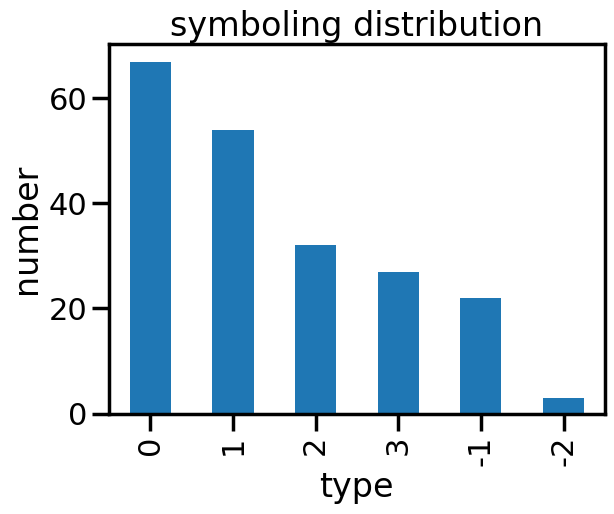

In [19]:
# 风险评估分布情况
print(pd.value_counts(ori_data['symboling'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['symboling']).plot(kind = 'bar')
plt.title("symboling distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show


gas       185
diesel     20
Name: fueltype, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

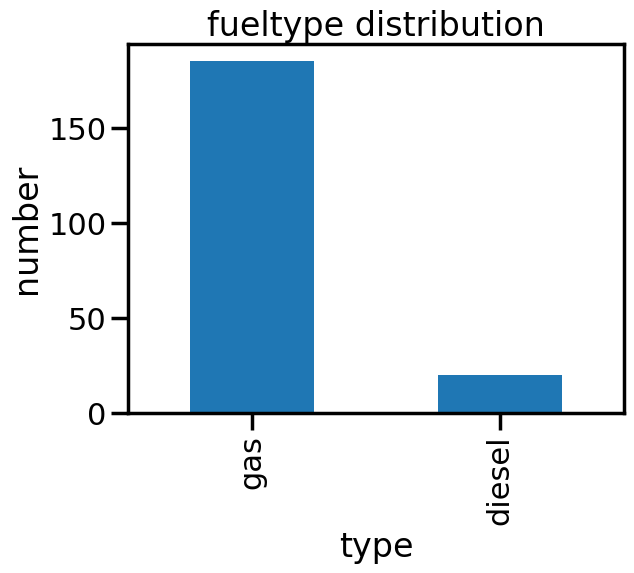

In [20]:
# 燃油类型分布情况
print(pd.value_counts(ori_data['fueltype'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['fueltype']).plot(kind = 'bar')
plt.title("fueltype distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

std      168
turbo     37
Name: aspiration, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

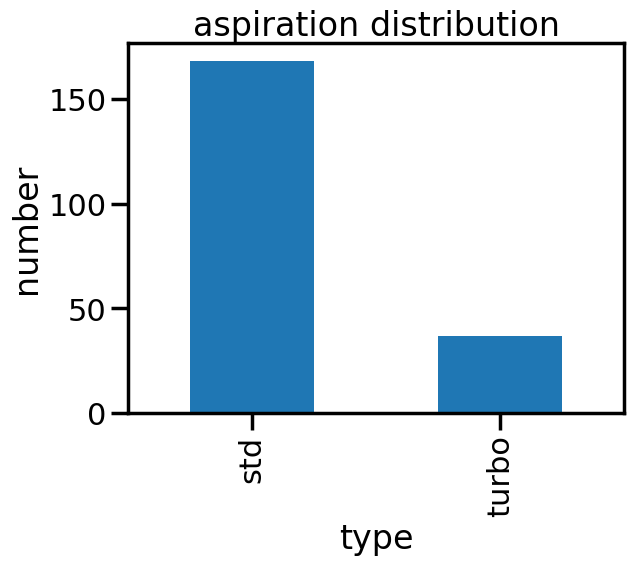

In [21]:
# 进气类型分布情况
print(pd.value_counts(ori_data['aspiration'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['aspiration']).plot(kind = 'bar')
plt.title("aspiration distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

four    115
two      90
Name: doornumber, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

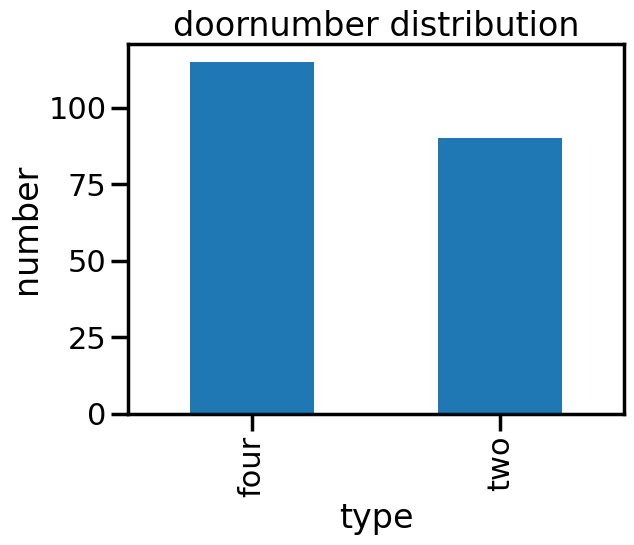

In [22]:
# 门数类型分布情况
print(pd.value_counts(ori_data['doornumber'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['doornumber']).plot(kind = 'bar')
plt.title("doornumber distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

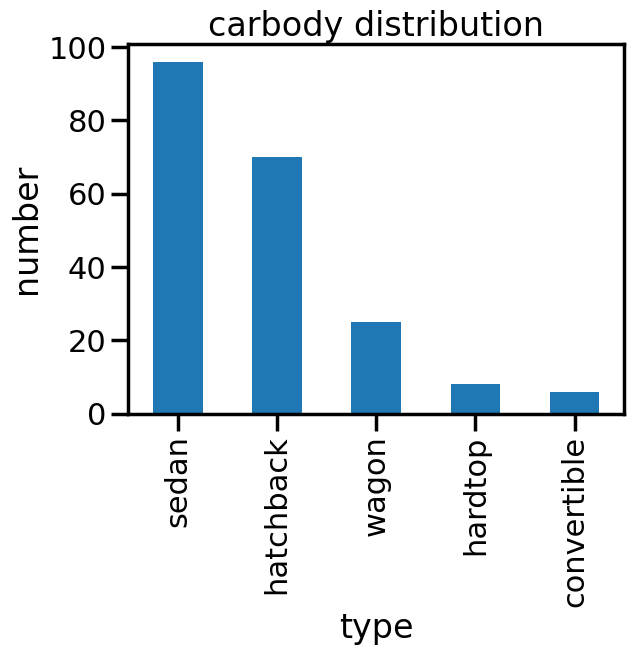

In [23]:
# 车型分布情况
print(pd.value_counts(ori_data['carbody'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['carbody']).plot(kind = 'bar')
plt.title("carbody distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

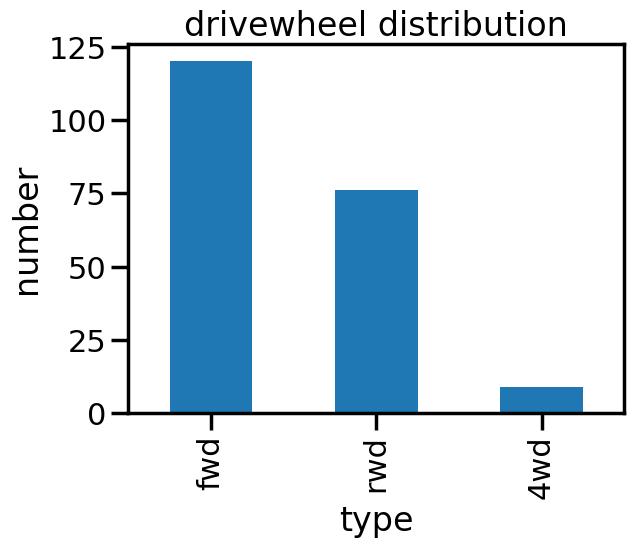

In [24]:
# 驱动车轮分布情况
print(pd.value_counts(ori_data['drivewheel'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['drivewheel']).plot(kind = 'bar')
plt.title("drivewheel distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

front    202
rear       3
Name: enginelocation, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

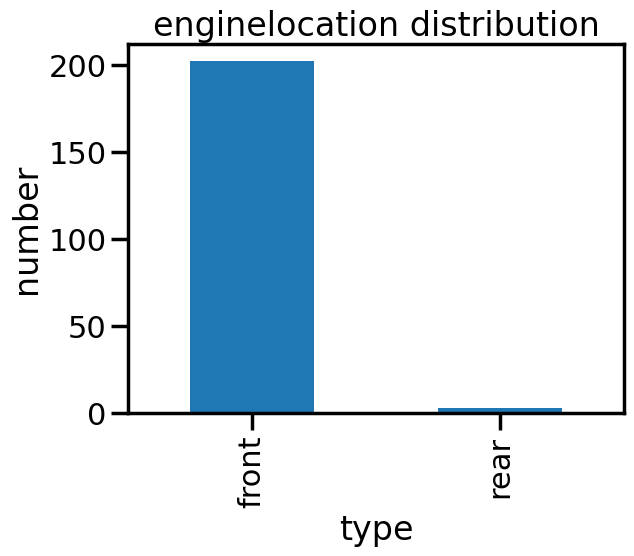

In [25]:
# 引擎位置分布情况
print(pd.value_counts(ori_data['enginelocation'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['enginelocation']).plot(kind = 'bar')
plt.title("enginelocation distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

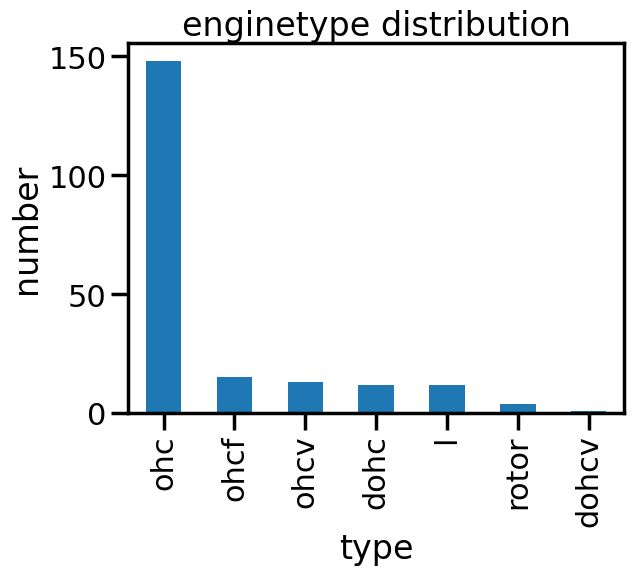

In [26]:
# 引擎类型分布情况
print(pd.value_counts(ori_data['enginetype'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['enginetype']).plot(kind = 'bar')
plt.title("enginetype distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

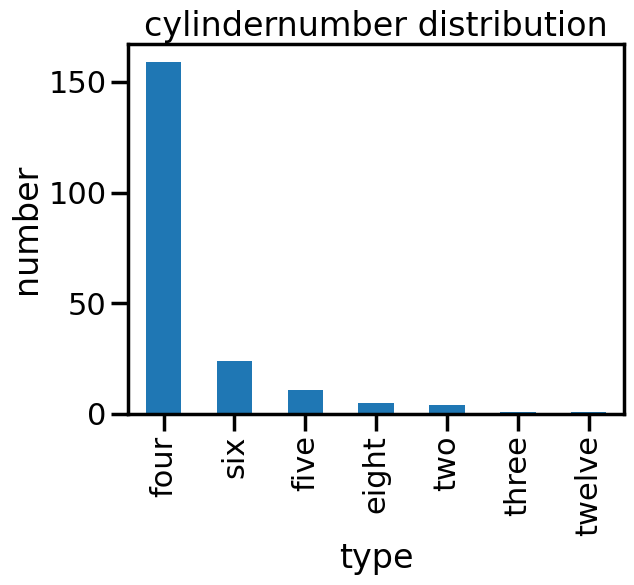

In [27]:
# 汽缸数分布情况
print(pd.value_counts(ori_data['cylindernumber'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['cylindernumber']).plot(kind = 'bar')
plt.title("cylindernumber distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

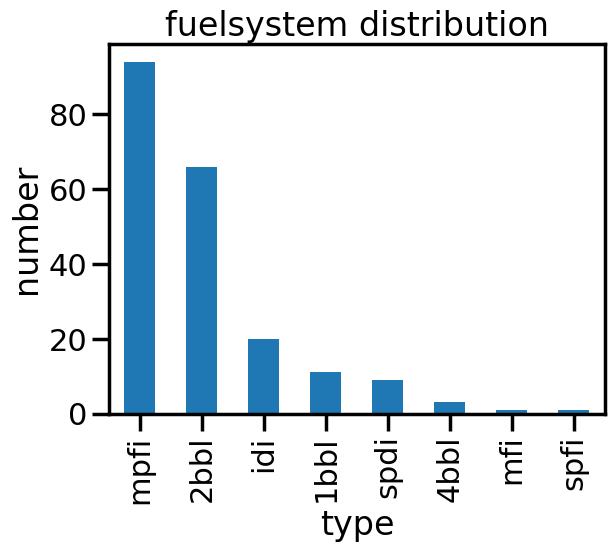

In [28]:
# 燃油系统分布情况
print(pd.value_counts(ori_data['fuelsystem'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['fuelsystem']).plot(kind = 'bar')
plt.title("fuelsystem distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

2.2 数值型变量分布及可视化

<ipython-input-29-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


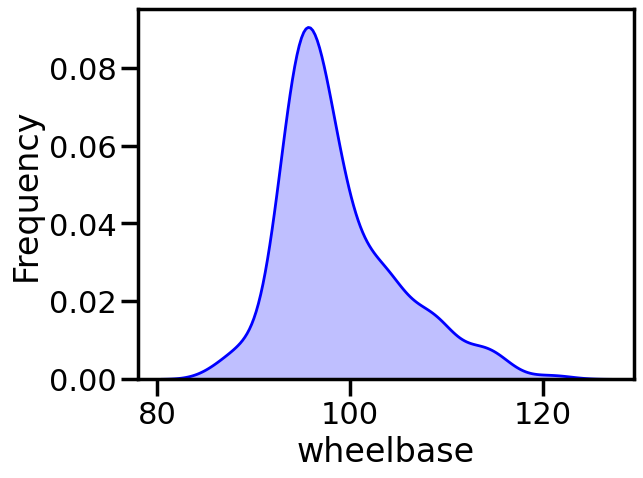

<ipython-input-29-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


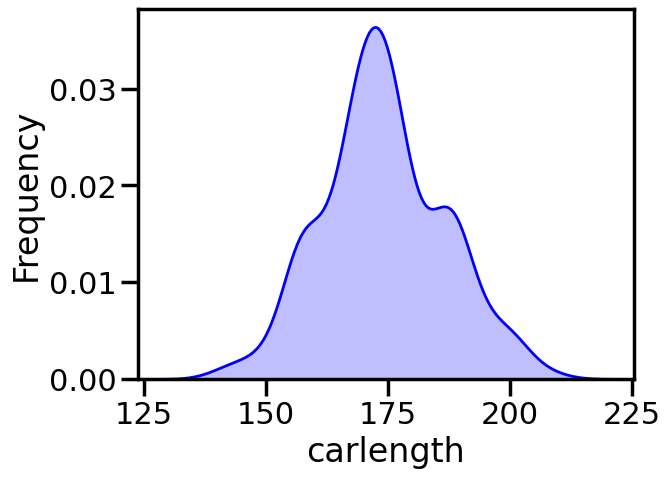

<ipython-input-29-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


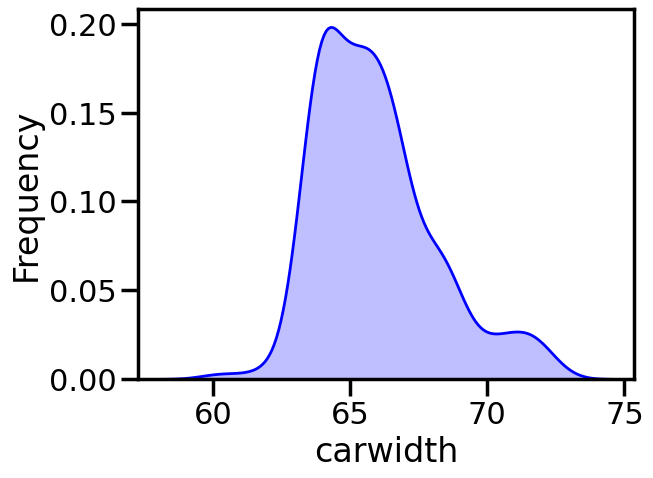

<ipython-input-29-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


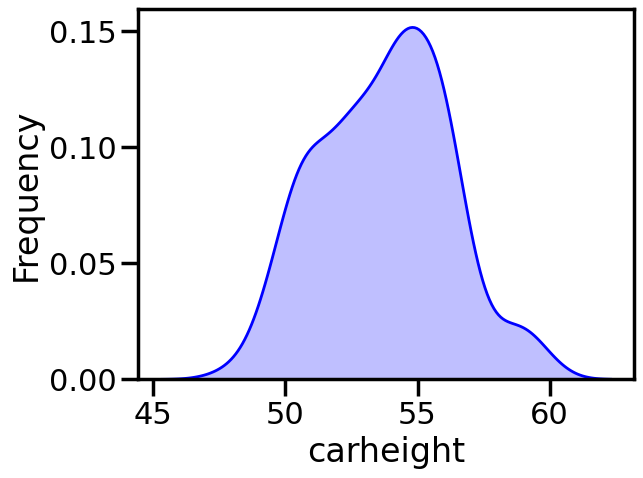

<ipython-input-29-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


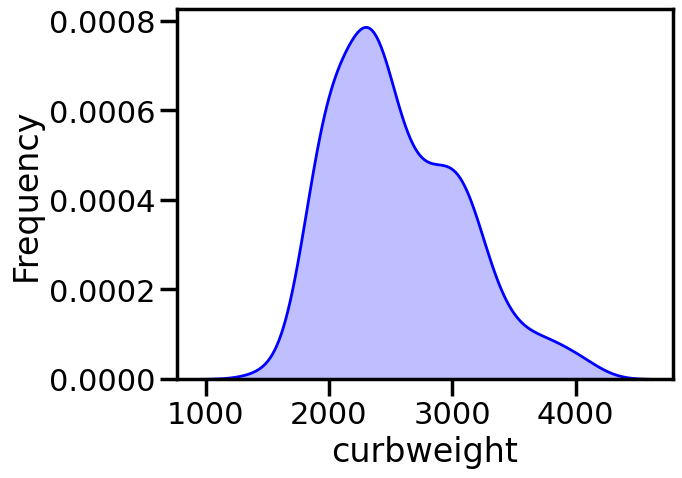

<ipython-input-29-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


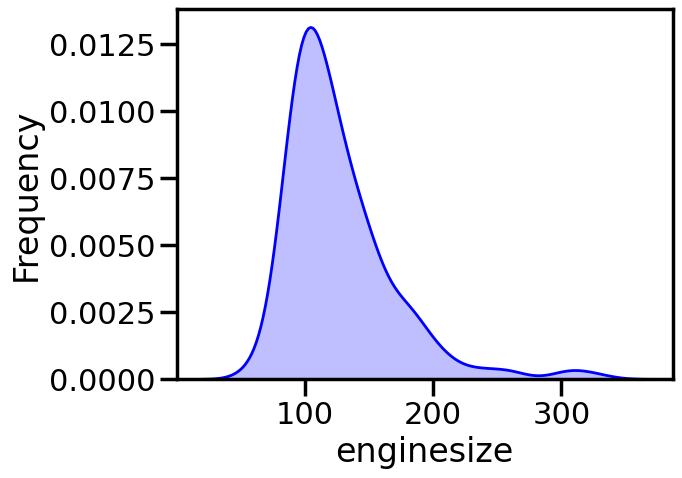

<ipython-input-29-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


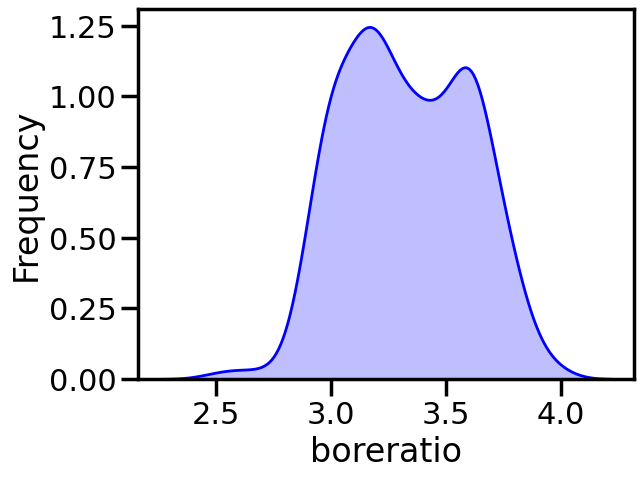

<ipython-input-29-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


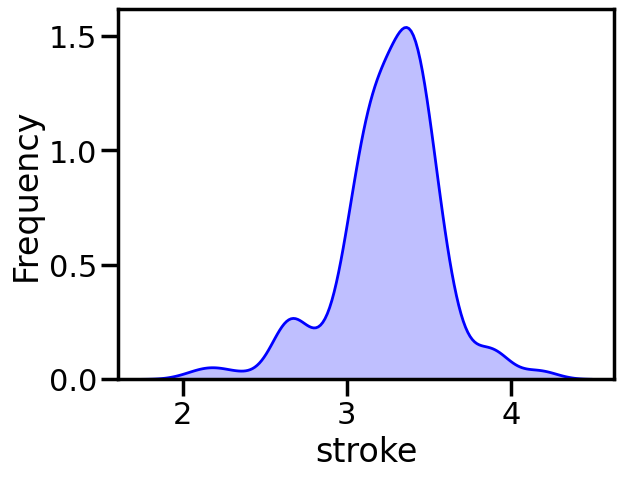

<ipython-input-29-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


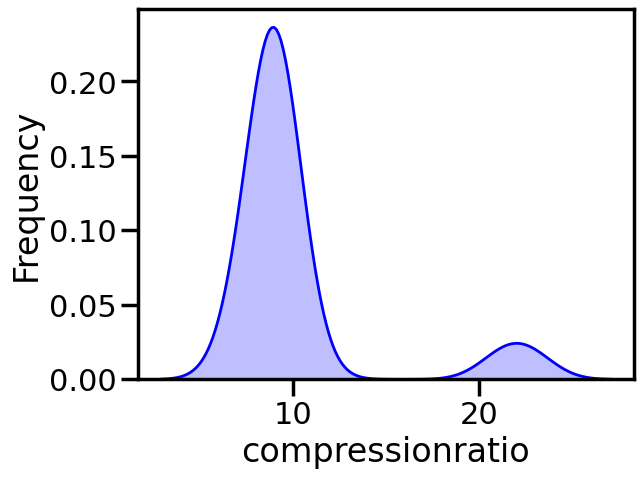

<ipython-input-29-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


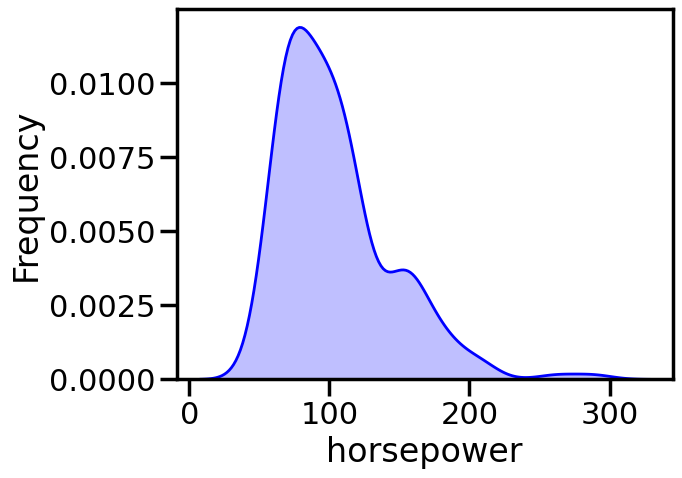

<ipython-input-29-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


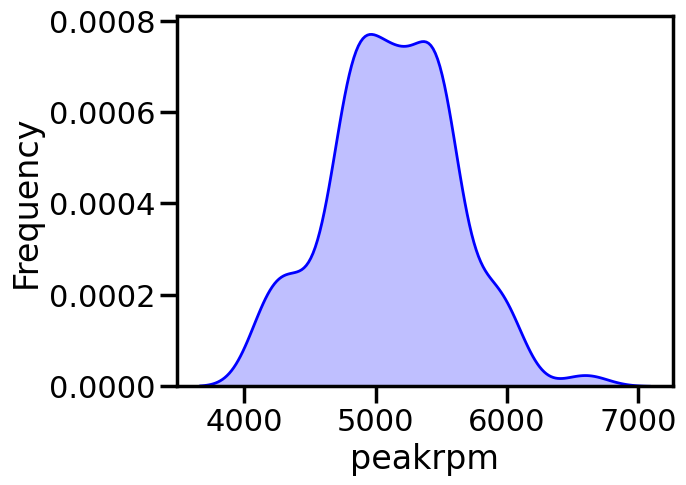

<ipython-input-29-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


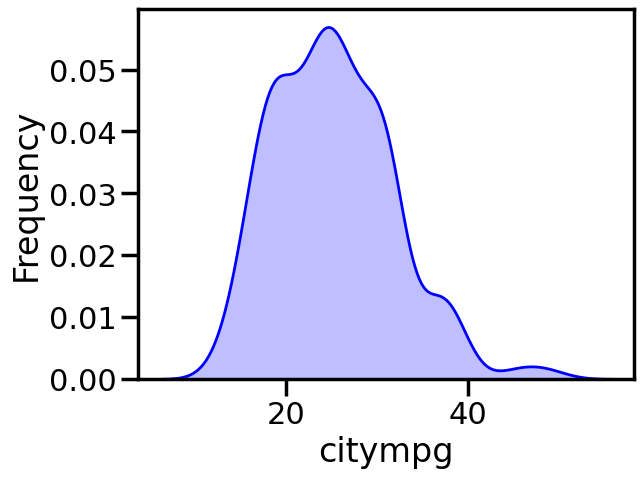

<ipython-input-29-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


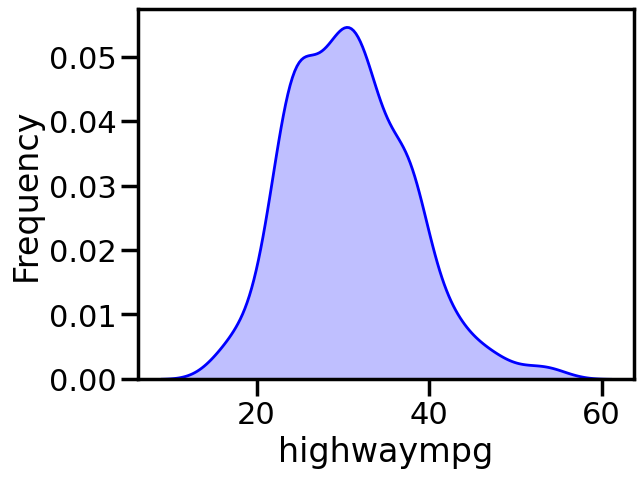

<ipython-input-29-e9450b2f011e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(ori_data[column], color="Blue", shade = True)


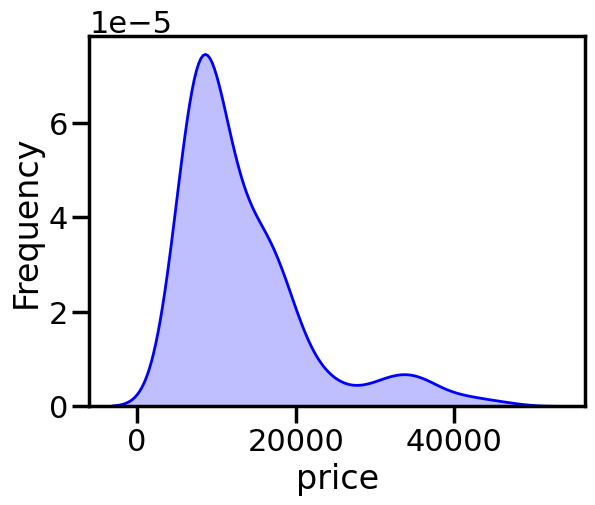

In [29]:
import seaborn as sns
ori_data_columns = ["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]
for column in ori_data_columns:
        g = sns.kdeplot(ori_data[column], color="Blue", shade = True)
        g.set_xlabel(column)
        g.set_ylabel("Frequency")
        plt.show()

3. 特征工程

3.1 根据车辆名称生成车辆品牌brand


In [30]:
# 对CarName列进行观察
ori_data['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [31]:
# 只取空格前面的品牌名称
ori_data['brand'] = [str(x).split()[0] for x in ori_data.loc[:, 'CarName']]

In [32]:
ori_data['brand'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: brand, dtype: int64

In [33]:
# 对brand中的脏数据进行清洗
ori_data.loc[182, 'brand'] = 'toyota'
ori_data.loc[190, 'brand'] = 'volkswagen'
ori_data.loc[191, 'brand'] = 'volkswagen'
ori_data.loc[183, 'brand'] = 'volkswagen'
ori_data.loc[51, 'brand'] = 'mazda'
ori_data.loc[52, 'brand'] = 'mazda'
ori_data.loc[127, 'brand'] = 'porsche'
ori_data.loc[90, 'brand'] = 'nissan'

In [34]:
ori_data['brand'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: brand, dtype: int64

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: brand, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

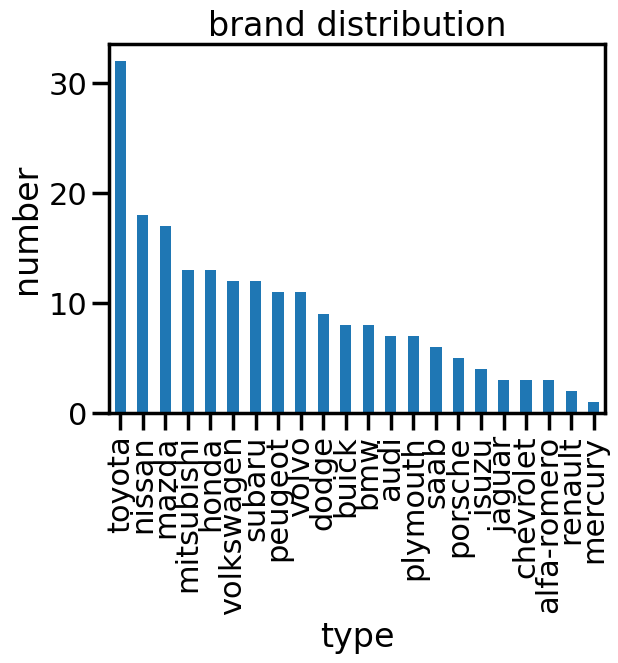

In [35]:
# 品牌分布情况
print(pd.value_counts(ori_data['brand'], sort=True))
# 图形化展示
from matplotlib import pyplot as plt
pd.value_counts(ori_data['brand']).plot(kind = 'bar')
plt.title("brand distribution")
plt.xlabel("type")
plt.ylabel("number")
plt.show

In [36]:
ori_data.to_csv('./car_price_data.csv')

In [37]:
import pandas as pd
data = pd.read_csv('car_price_data.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


3.2 查看数值型变量间的相关性

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_num = data.drop(columns = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'car_ID', 'CarName', 'brand'])
data_num

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [39]:
# 计算数值型变量间的相关性
corr = data_num.corr()

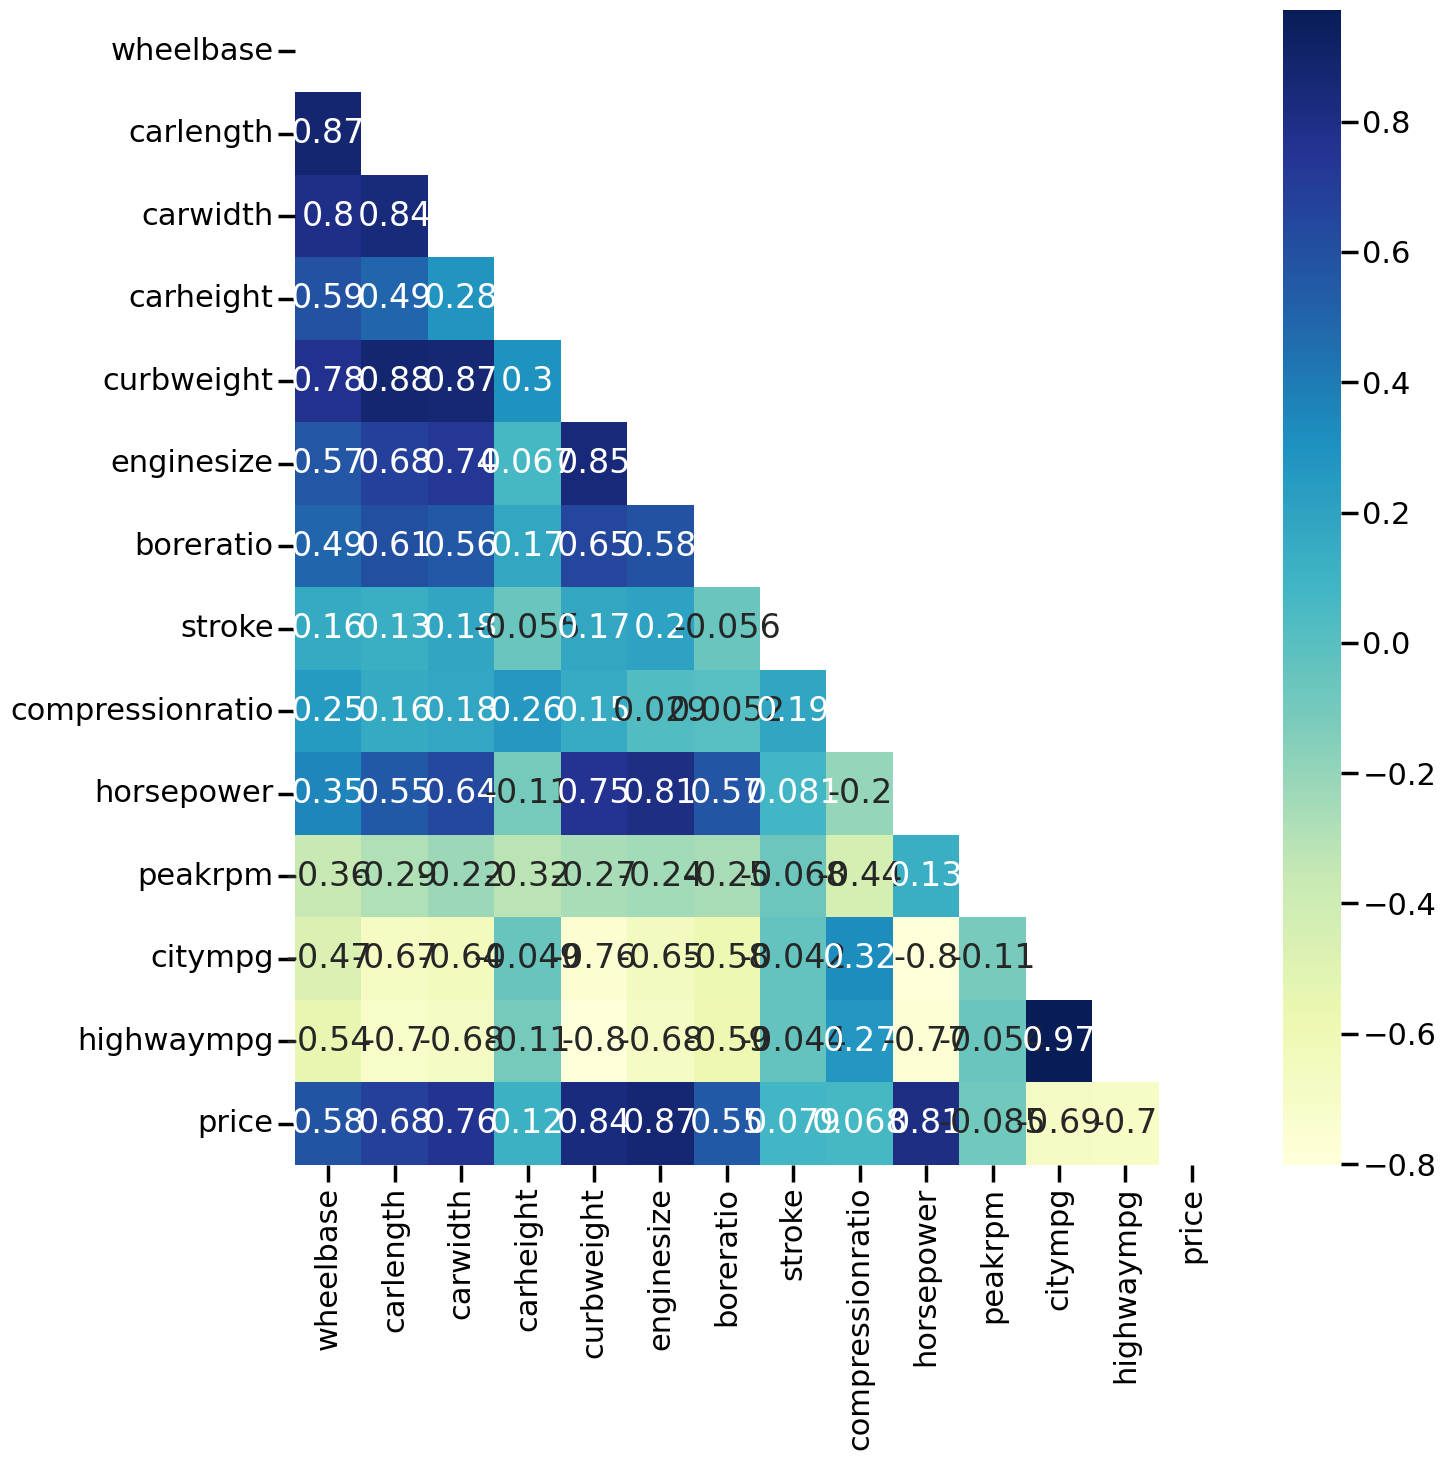

In [40]:
# 相关性可视化
plt.figure(figsize = (15,15))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True, mask=mask, cmap="YlGnBu")
plt.show()

1.多个数值型变量之间存在相关关系，如：城市mpg和高速mpg之间存在高度相关关系、引擎大小和马力之间存在高度相关关系等。

2.拟采用的二阶段聚类法要求数值型变量之间相互独立，因此需要对数值型变量进行进一步处理。

3.3 高相关性数值型变量的处理

1. highwaympg和citympg呈高度正相关。其实不管是高速mpg还是城市mpg，其本质都是mpg指标，而且通过观察数据，二者之间的差异较小（极值、均值），因此考虑将二者合并为一个指标'mpg'，计算方式为取二者均值：mpg=(highwaympg+citympg)/2

2. price变量与其余变量产生高相关性的频数最多，可能是因为车辆自身属性和配置的变动会直接影响着车辆的市场价格。此外，与其他变量相比，price属性属于车辆的市场销售属性（而非车辆自身属性），在聚类中更适合作为类别型变量，对车辆的价位进行划分，因此，考虑将price变量转换为类别型变量，按照其价格分布划分为low price、medium price、high price三类。

3. 对于其他车辆自身属性变量，考虑采用因子分析进行降维（主成分分析无法解释主成分的现实含义，不利于最终聚类结果的解读，因此选用因子分析），以使数值型变量之间相互独立。


In [41]:
# mpg特征生成
data['mpg'] = (data['highwaympg'] + data['citympg'])/2

In [42]:
data.drop(columns=['highwaympg', 'citympg'], inplace=True)

In [43]:
# price变量分组，转化为类别型变量
# 按照price变量的数据描述及分布，设置：10000以下为低价位车；10000-20000为中等价位车；20000以上为高价位车
data.to_csv('./car_price_data_process.csv')

In [44]:
import pandas as pd
data = pd.read_csv("./car_price_data_process.csv")
data.drop(columns='Unnamed: 0', inplace=True)
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,brand,mpg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,24.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,24.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,22.5
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,27.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,20.0


In [45]:
data['price_range'] = pd.cut(data['price'], [0, 10000, 20000, 50000], labels=['low_price', 'medium_price', 'high_price'])

In [46]:
data.drop(columns=['price'], inplace=True)
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,brand,mpg,price_range
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,alfa-romero,24.0,medium_price
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,alfa-romero,24.0,medium_price
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,alfa-romero,22.5,medium_price
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,audi,27.0,medium_price
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,audi,20.0,medium_price


In [47]:
data.to_csv('./car_price_data_process.csv', index=False)

3.4 数值型变量因子分析（SPSS实现）

In [48]:
import pandas as pd
data = pd.read_csv('./car_price_data_process.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,brand,mpg,price_range
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,alfa-romero,24.0,medium_price
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,alfa-romero,24.0,medium_price
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,alfa-romero,22.5,medium_price
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,audi,27.0,medium_price
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,audi,20.0,medium_price


结合之前所做的变量相关性分析与初步因子分析结果，stroke变量与其余变量相关性较低，因子分析对该变量的解释性较差，因此考虑删除该变量。

In [49]:
data.drop(columns=['stroke'], inplace=True)

In [50]:
data.to_csv('./car_price_data_process.csv', index=False)

利用SPSS对11个数值型变量进行因子分析，最终得到两个因子：
1. 第一个因子包括：车长、车宽、车净重、引擎尺寸、车轴距、mpg、马力、车内径比，简单将该因子归纳为车辆截面与马力因子
2. 第二个因子包括：车高、峰值转速、车压缩比，简单将该因子归纳为车辆垂面与转速因子



Python因子分析 模拟 SPSS因子分析

In [51]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


3.4.1 数据预处理

In [52]:
# 删除无关列
data_num = data.drop(columns = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'car_ID', 'CarName', 'brand', 'price_range'])
data_num

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,compressionratio,horsepower,peakrpm,mpg
0,88.6,168.8,64.1,48.8,2548,130,3.47,9.0,111,5000,24.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,9.0,111,5000,24.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,9.0,154,5000,22.5
3,99.8,176.6,66.2,54.3,2337,109,3.19,10.0,102,5500,27.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,8.0,115,5500,20.0
...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,9.5,114,5400,25.5
201,109.1,188.8,68.8,55.5,3049,141,3.78,8.7,160,5300,22.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,8.8,134,5500,20.5
203,109.1,188.8,68.9,55.5,3217,145,3.01,23.0,106,4800,26.5


In [53]:
# 查看是否有缺失值
data_num.isnull().sum()


wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
compressionratio    0
horsepower          0
peakrpm             0
mpg                 0
dtype: int64

In [54]:
# 删除缺失值
data_num.dropna(inplace=True)
data_num.shape

(205, 11)

3.4.2 充分性检验

In [55]:
# 导入所需库
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


In [56]:
# 因子分析可靠性检验

kmo_all, kmo_model = calculate_kmo(data_num)
chi_square_value, p_value = calculate_bartlett_sphericity(data_num)
 
print("kmo_all:", kmo_all, end="\n\n")
print("kmo_model:", kmo_model, end="\n\n")
print("chi_square_value:", chi_square_value, end="\n\n")
print("p_value:", p_value)

kmo_all: [0.86359805 0.92053466 0.9291377  0.77825761 0.85871276 0.84523099
 0.93308077 0.48684476 0.79968043 0.61591586 0.82268846]

kmo_model: 0.8465802309129695

chi_square_value: 2303.4168619833313

p_value: 0.0


* KMO检验表明KMO统计量值为0.85，表明数据适合进行因子分析。
* 同时巴特莱特球形检验p值为0，拒绝原假设（相关系数矩阵为单位矩阵），变量之间存在相关关系，适合做因子分析。



3.4.3 提取公因子

进行探索性因子分析，确定提取公因子个数。计算相关系数矩阵特征根和特征向量。



In [57]:
# 探索性因子分析
fa = FactorAnalyzer(25, rotation=None)
fa.fit(data_num)
 
# 相关系数矩阵的特征根和特征向量
ev, v = fa.get_eigenvalues()
ev, v
 
# 根据特征根>1发现，可提取2个公因子
# 5.98606435, 2.12172533

(array([5.98606435, 2.12172533, 0.92991709, 0.65557281, 0.44406903,
        0.30651496, 0.20898023, 0.13380667, 0.08750202, 0.07732623,
        0.04852128]),
 array([ 5.91154654e+00,  1.88261964e+00,  6.80828178e-01,  3.44700128e-01,
         1.74161692e-01,  1.34744013e-01,  9.92348500e-02,  4.89143501e-02,
         1.48063229e-02,  2.98731765e-03, -6.37132276e-06]))

绘制碎石图进一步确定因子个数

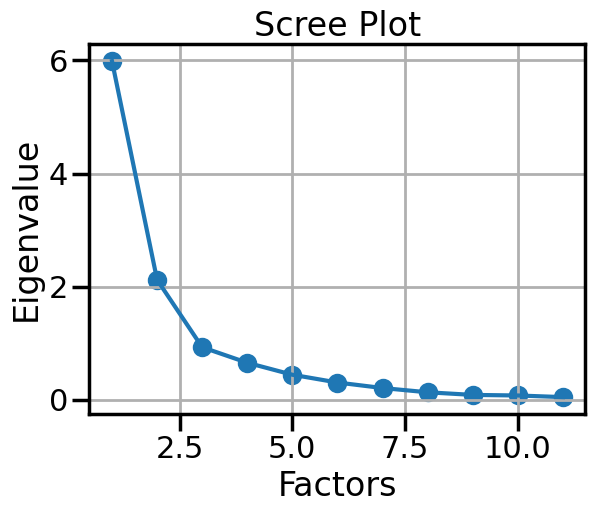

In [58]:
# 绘制碎石图，选择因子数
plt.scatter(range(1,data_num.shape[1]+1),ev)
plt.plot(range(1,data_num.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

3.4.4 因子旋转

建立明确的因子分析模型，并对因子进行方差最大化的正交旋转。

In [59]:
# 建立因子分析模型
fa_six = FactorAnalyzer(6, rotation="varimax")
fa_six.fit(data_num)
 
# 输出因子的载荷
fa_six.loadings_
 
# pd.DataFrame(fa_six.loadings_, index=data_num.columns)


array([[ 0.4272697 ,  0.72818592,  0.40404767,  0.17560841,  0.12381297,
         0.01914224],
       [ 0.63844943,  0.59868656,  0.3409904 ,  0.12509087,  0.07749046,
        -0.11483556],
       [ 0.6821179 ,  0.57554366,  0.12798156,  0.06432519,  0.14396138,
         0.02908081],
       [ 0.00725587,  0.22335929,  0.95661481,  0.13647651,  0.10631451,
        -0.00975776],
       [ 0.83942918,  0.43433313,  0.16876428,  0.12181978,  0.11979096,
        -0.02162576],
       [ 0.86368374,  0.2309448 , -0.01403709,  0.17056838,  0.02890952,
         0.25135519],
       [ 0.63732995,  0.19262281,  0.1044666 ,  0.19447481, -0.02465856,
        -0.14933704],
       [-0.0686017 ,  0.10775821,  0.11206661,  0.20900147,  0.96068523,
         0.00818368],
       [ 0.942896  ,  0.03984713, -0.09659294, -0.15870079, -0.10389879,
         0.06361094],
       [-0.05764679, -0.11356521, -0.14683186, -0.95339796, -0.22078946,
        -0.00710399],
       [-0.80620219, -0.28278347, -0.05365149,  0.

In [60]:
pd.DataFrame(fa_six.loadings_, index=data_num.columns)

,0,1,2,3,4,5
wheelbase,0.427270,0.728186,0.404048,0.175608,0.123813,0.019142
carlength,0.638449,0.598687,0.340990,0.125091,0.077490,-0.114836
carwidth,0.682118,0.575544,0.127982,0.064325,0.143961,0.029081
carheight,0.007256,0.223359,0.956615,0.136477,0.106315,-0.009758
curbweight,0.839429,0.434333,0.168764,0.121820,0.119791,-0.021626
enginesize,0.863684,0.230945,-0.014037,0.170568,0.028910,0.251355
boreratio,0.637330,0.192623,0.104467,0.194475,-0.024659,-0.149337
compressionratio,-0.068602,0.107758,0.112067,0.209001,0.960685,0.008184
horsepower,0.942896,0.039847,-0.096593,-0.158701,-0.103899,0.063611
peakrpm,-0.057647,-0.113565,-0.146832,-0.953398,-0.220789,-0.007104


结果看起来并不直观，无法看出哪些因子对变量的解释程度较高，对数据进行可视化展示结果。

Text(118.91666666666666, 0.5, 'Items')

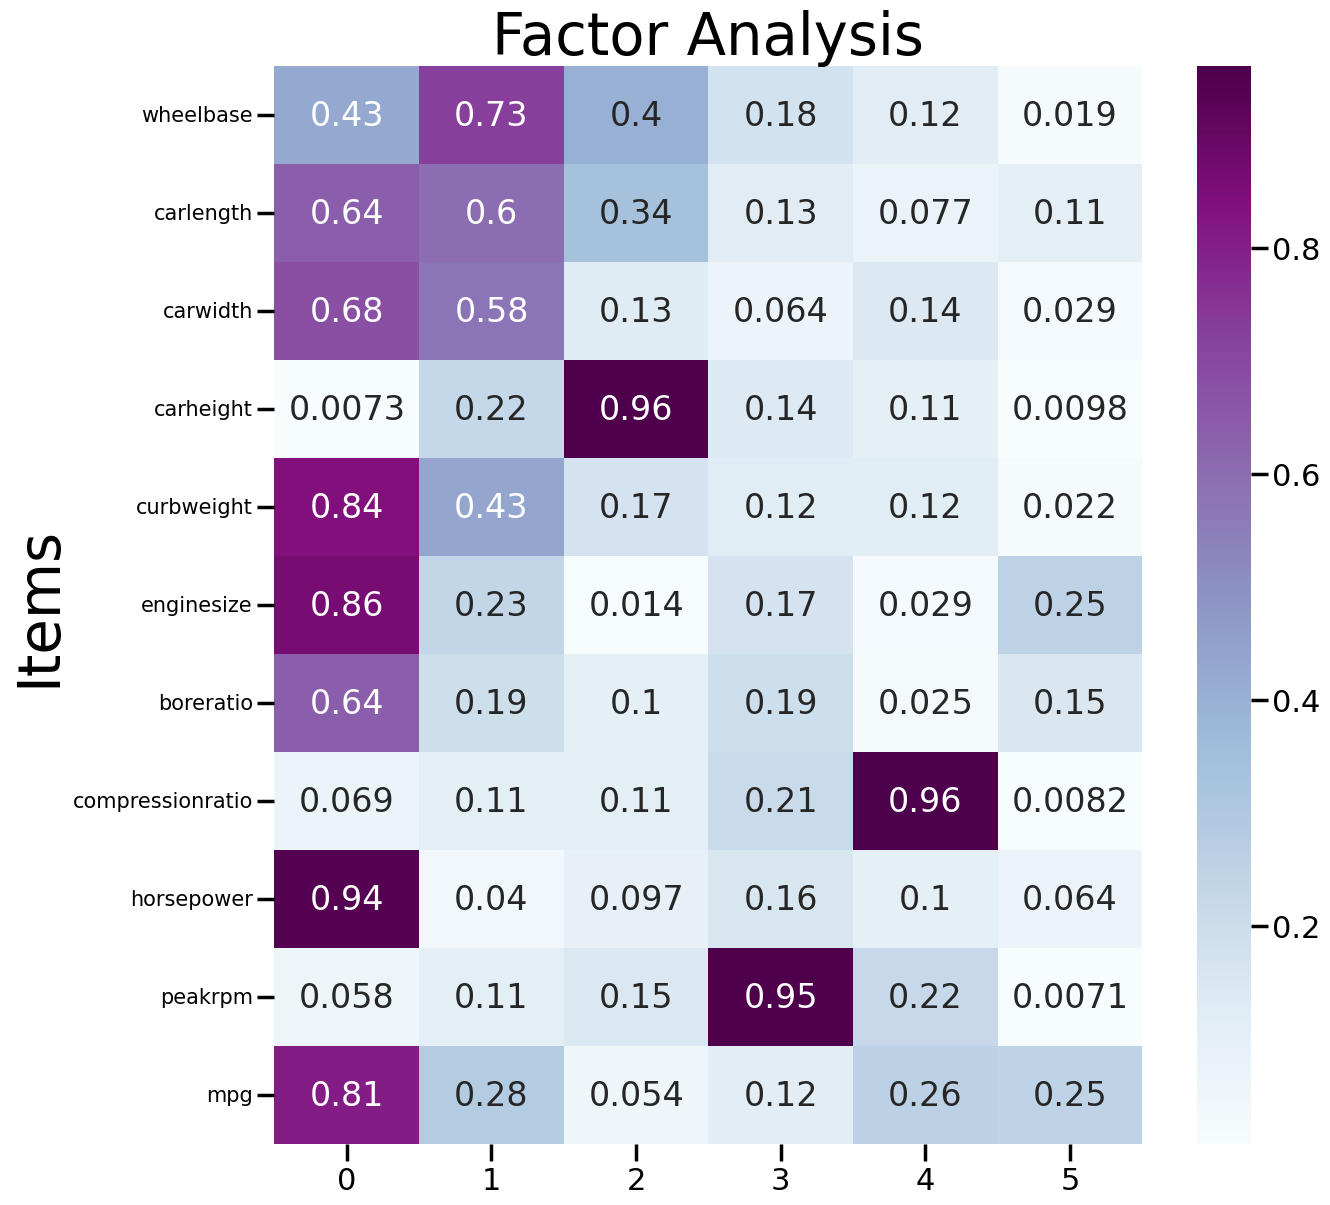

In [61]:
import seaborn as sns
df_cm = pd.DataFrame(np.abs(fa_six.loadings_), index=data_num.columns)
 
plt.figure(figsize = (14,14))
ax = sns.heatmap(df_cm, annot=True, cmap="BuPu")
 
# 设置y轴的字体的大小
ax.yaxis.set_tick_params(labelsize=15)
 
plt.title('Factor Analysis', fontsize='xx-large')
# 设置y轴标签
plt.ylabel('Items', fontsize='xx-large')
 
# 保存图片
# plt.savefig(r'FactorAnalysis.png', dpi=500)


由上图可以得知：
* 因子5对所有变量都没有高负荷，也不容易解释，需要调整因子
* 因子4、3仅对一个变量有高负荷，其他没有，需要调整
* 因子2仅对一个变量有高负荷，其他较弱，可以调整

因此选择2个公因子，重复上面的步骤：

Text(118.91666666666666, 0.5, 'Items')

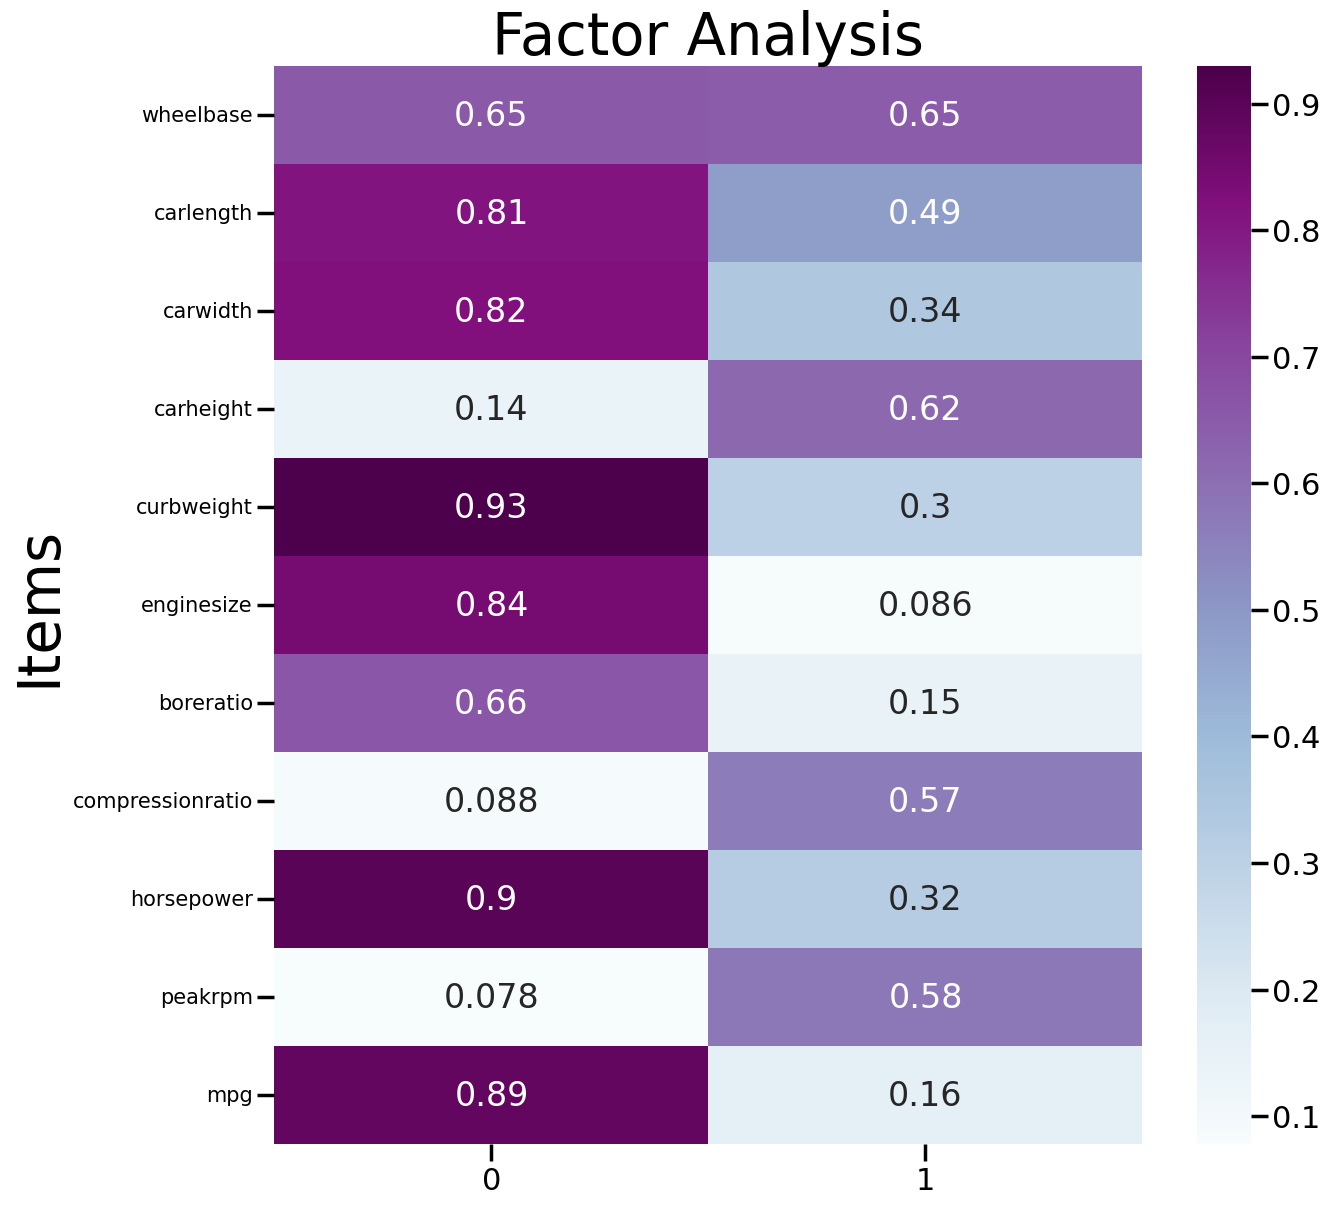

In [62]:
# 建立因子分析模型，设置公因子个数为2
fa_two = FactorAnalyzer(2, rotation="varimax")
fa_two.fit(data_num)
 
import seaborn as sns
df_cm = pd.DataFrame(np.abs(fa_two.loadings_), index=data_num.columns)
 
plt.figure(figsize = (14,14))
ax = sns.heatmap(df_cm, annot=True, cmap="BuPu")
 
# 设置y轴的字体的大小
ax.yaxis.set_tick_params(labelsize=15)
 
plt.title('Factor Analysis', fontsize='xx-large')
# 设置y轴标签
plt.ylabel('Items', fontsize='xx-large')


根据上图结果：

因子1在变量（carlength, carwidth, curbweight, enginesize, wheelbase, mpg, horsepower, boreratio）上具有较高载荷，可定义因子1为车辆截面与马力因子。

因子2在变量（carheight, peakrpm, compressionratio）上具有较高载荷，可定义因子2为车辆垂面与转速因子。

第一个因子包括：车长、车宽、车净重、引擎尺寸、车轴距、mpg、马力、车内径比，简单将该因子归纳为车辆截面与马力因子。

第二个因子包括：车高、峰值转速、车压缩比，简单将该因子归纳为车辆垂面与转速因子。


In [63]:
# 方差累计贡献
fa_v = fa_two.get_factor_variance()
fa_dt = pd.DataFrame({
    "特征根": fa_v[0],
    "方差贡献率": fa_v[1],
    "方差累计贡献率": fa_v[2]
})
 
fa_dt

,特征根,方差贡献率,方差累计贡献率
0,5.404453,0.491314,0.491314
1,2.062848,0.187532,0.678846


2个因子的特征值之和占特征值总和的67.88%，也可以说2个因子解释了全部变量的67.88%的信息。

3.4.5 计算因子得分

In [64]:
# 计算因子得分
score = fa_two.transform(data_num)
score

array([[ 0.04721229, -1.09205295],
       [ 0.04721229, -1.09205295],
       [ 0.82265607, -1.59535283],
       [-0.10734152, -0.28661963],
       [ 0.48551838, -0.47000907],
       [ 0.18930739, -0.60313238],
       [ 0.70703606,  0.61401075],
       [ 0.78201274,  0.76720914],
       [ 1.32237928,  0.01797273],
       [ 1.31734693, -1.11813693],
       [-0.08452483, -0.09543162],
       [-0.08452483, -0.09543162],
       [ 0.43091017, -0.21631958],
       [ 0.46839851, -0.13972038],
       [ 0.88588273,  0.55772057],
       [ 1.60223557, -0.55795336],
       [ 1.80480261, -0.21577715],
       [ 2.03743833,  0.24080838],
       [-2.24475164, -0.09200887],
       [-1.32205201, -0.03931041],
       [-1.26441373,  0.09240094],
       [-1.29331231, -0.14854912],
       [-1.20431096, -0.54310974],
       [-0.4623941 , -1.49932327],
       [-1.139437  , -0.41715463],
       [-1.12444166, -0.38651495],
       [-1.12444166, -0.38651495],
       [-0.41660511, -1.41236411],
       [-0.19580298,

In [65]:
# 计算综合得分
x = score @ (fa_v[1])
result = pd.DataFrame(x, columns=["综合得分"], index=data_num.index)
result.sort_values(by="综合得分", ascending=False, inplace=True)
result

,综合得分
73,1.503682
48,1.427755
47,1.427755
71,1.263588
70,1.231471
...,...
33,-0.772249
32,-0.785805
30,-0.910797
31,-0.976076


In [66]:
# 将因子分析所得的两个因子加入原数据，删除原数据中参与因子分析的数值型数据，以完成二阶段聚类所要求的变量间相互独立的要求
import pandas as pd
data = pd.read_csv('./car_price_data_process.csv')
#data.head()



In [67]:
data['FAC1'] = score[:,0]
data['FAC2'] = score[:,1]
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,compressionratio,horsepower,peakrpm,brand,mpg,price_range,FAC1,FAC2
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,9.0,111,5000,alfa-romero,24.0,medium_price,0.047212,-1.092053
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,9.0,111,5000,alfa-romero,24.0,medium_price,0.047212,-1.092053
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,9.0,154,5000,alfa-romero,22.5,medium_price,0.822656,-1.595353
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,10.0,102,5500,audi,27.0,medium_price,-0.107342,-0.286620
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,8.0,115,5500,audi,20.0,medium_price,0.485518,-0.470009


In [68]:
data_new = data.drop(columns=["carlength", "carwidth", "curbweight", "enginesize", "wheelbase", "mpg", "horsepower", "boreratio", "carheight", "peakrpm", "compressionratio"])

In [69]:
data_new.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand,price_range,FAC1,FAC2
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,medium_price,0.047212,-1.092053
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,medium_price,0.047212,-1.092053
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero,medium_price,0.822656,-1.595353
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi,medium_price,-0.107342,-0.286620
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi,medium_price,0.485518,-0.470009


In [70]:
data_new = data_new.rename(columns = {'FAC1':'section_horsepower', "FAC2":'vertical_rpm'})
data_new.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand,price_range,section_horsepower,vertical_rpm
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,medium_price,0.047212,-1.092053
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,medium_price,0.047212,-1.092053
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero,medium_price,0.822656,-1.595353
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi,medium_price,-0.107342,-0.286620
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi,medium_price,0.485518,-0.470009


In [71]:
# 再次检查两数值型变量的相关性
data_num = data_new[['section_horsepower', 'vertical_rpm']]

In [72]:
corr = data_num.corr()
corr

,section_horsepower,vertical_rpm
section_horsepower,1.000000,0.018797
vertical_rpm,0.018797,1.000000


In [73]:
# 由下表可以看到两个因子之间的相关性非常小，两个因子之间相互独立
data_new.to_csv('./car_price_data_processed.csv', index=False)

<ipython-input-74-88b895ef3112>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(data_new[column], color="Blue", shade = True)


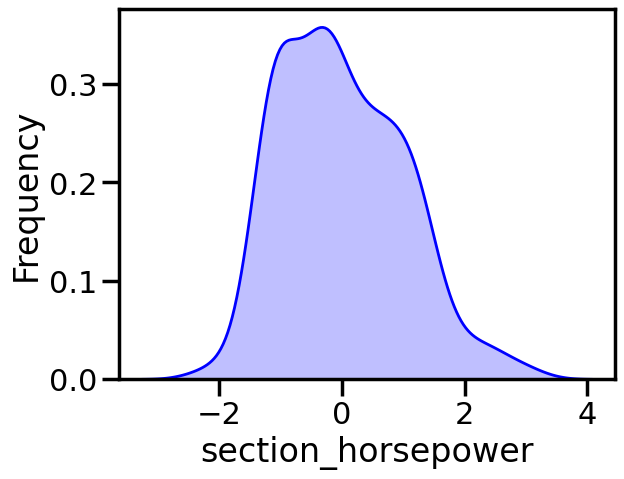

<ipython-input-74-88b895ef3112>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(data_new[column], color="Blue", shade = True)


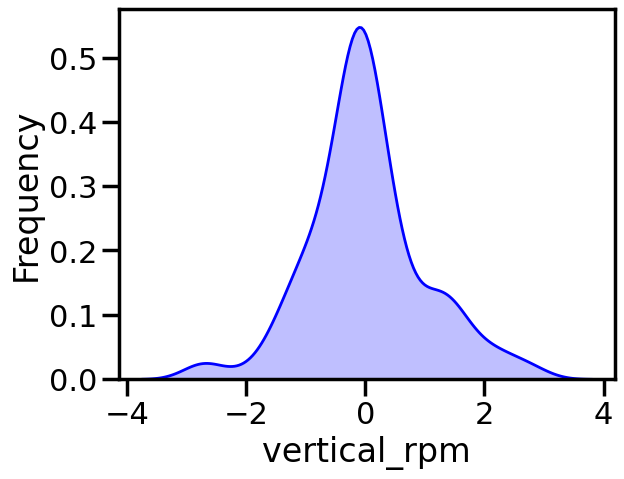

In [74]:
# 两个因子的分布情况
import seaborn as sns
ori_data_columns = ["section_horsepower", "vertical_rpm"]
for column in ori_data_columns:
        g = sns.kdeplot(data_new[column], color="Blue", shade = True)
        g.set_xlabel(column)
        g.set_ylabel("Frequency")
        plt.show()

4. 两阶段聚类（SPSS实现）

两阶段聚类适用于数据中即包含分类变量又包含数值型变量的情况。

两阶段聚类要求数值型变量间相互独立（之前的因子分析已经实现了两个因子间的相互独立）且服从正态分布。

利用SPSS对处理后的数据进行二阶段分类，最终将数据中的车辆分为两类，两种类别之间在驱动类型、燃油系统、车辆截面数据与马力、车辆价位四个特征上具有明显的区分。



TwoStep节点使用二阶聚类方法。第一步完成简单数据处理，以便将原始输入数据压缩为可管理的子聚类集合。第二步使用层级聚类方法将子聚类一步一步合并为更大的聚类。TwoStep 具有一个优点，就是能够为训练数据自动估计最佳聚类数。它可以高效处理混合的字段类型和大型的数据集。



K均值聚类、分层聚类、二阶聚类是SPSS聚类分析中常用的三种聚类方法。K均值聚类使用的是欧式距离的测量方法；分层聚类是根据度量的距离远近，构建谱系分析；二阶聚类是利用距离测量得到分类树，然后再利用BIC或AIC准则判别最佳聚类。


K均值聚类简单快速，但无法分析分类变量、容易受异常值影响；系统聚类，可对个案与变量聚类，可对连续与分类变量聚类，但依靠谱系图分析，当数据量大时，分析速度慢；二阶聚类，自动程度高，可同时分析分类与连续变量，但容易受到分类变量的影响。




k-means聚类算法是一种简单易行，时间复杂度低的聚类算法，特别是针对大规模的数据集，也是采取最多的聚类方法。但其只能处理数值属性限制了它的应用范围，如果处理其他类型的数据，则会造成一定的偏差。



k-modes算法是在数据挖掘中对分类属性型数据的采用的聚类算法。k-modes算法是对k-means算法的扩展。k-means算法是在数据挖掘领域中普遍应用的聚类算法，它只能处理数值型数据，而不能处理分类属性型数据。例如表示人的属性有：姓名、性别、年龄、家庭住址等属性。而k-modes算法就能够处理分类属性型数据。

k-modes算法采用差异度来代替k-means算法中的距离。k-modes算法中差异度越小，则表示距离越小。一个样本和一个聚类中心的差异度就是它们各个属性不相同的个数，不相同则记为一，最后计算一的总和。这个和就是某个样本到某个聚类中心的差异度。该样本属于差异度最小的聚类中心。



k-prototype算法是结合k-means与k-modes算法，针对混合属性的，解决2个核心问题如下：
1. 度量具有混合属性的方法是，数值属性采用k-means方法得到P1，分类属性采用k-modes方法P2，那么D=P1+a*P2，a是权重，如果觉得分类属性重要，则增加a，否则减少a，a=0时即只有数值属性；
2. 更新一个簇的中心的方法，方法是结合k-means与k-modes的更新方法。




In [75]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_new_num = pd.read_csv('./car_price_data_processed.csv')
type_dims = ["symboling","CarName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem","brand","price_range"]
for type_dim in type_dims:
  data_new_num[type_dim] = le.fit_transform(data_new_num[type_dim] )

data_new_num.to_csv('./car_price_data_processed_num.csv', index=False)

https://github.com/MaxHalford/prince

In [76]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data_processed = pd.read_csv('./car_price_data_processed.csv')
#type_dims = ["symboling","CarName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem","brand","price_range"]
type_dims = ["CarName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem","brand","price_range"]
data_processed[type_dims]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand,price_range
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,medium_price
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,medium_price
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero,medium_price
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi,medium_price
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi,medium_price
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi,volvo,medium_price
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,volvo,medium_price
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,volvo,high_price
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,volvo,high_price


In [77]:
!pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
import prince

mca = prince.MCA(
    n_components=100,
    n_iter=100,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(data_processed[type_dims])

In [79]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.425,2.58%,2.58%
1,0.360,2.18%,4.76%
2,0.335,2.03%,6.79%
3,0.288,1.75%,8.53%
4,0.276,1.67%,10.21%
...,...,...,...
95,0.083,0.51%,73.32%
96,0.083,0.51%,73.83%
97,0.083,0.51%,74.33%


In [80]:
##!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip
##!unzip balloon_dataset.zip > /dev/null
#!wget https://nrvis.com/data/mldata/balloons.csv

In [81]:
import base64

encodedMdl=r'JUNvbG9yLHNpemUsYWN0LGFnZSxpbmZsYXRlZApZRUxMT1csU01BTEwsU1RSRVRDSCxBRFVMVCxUCllFTExPVyxTTUFMTCxTVFJFVENILENISUxELFQKWUVMTE9XLFNNQUxMLERJUCxBRFVMVCxUCllFTExPVyxTTUFMTCxESVAsQ0hJTEQsRgpZRUxMT1csU01BTEwsRElQLENISUxELEYKWUVMTE9XLExBUkdFLFNUUkVUQ0gsQURVTFQsVApZRUxMT1csTEFSR0UsU1RSRVRDSCxDSElMRCxUCllFTExPVyxMQVJHRSxESVAsQURVTFQsVApZRUxMT1csTEFSR0UsRElQLENISUxELEYKWUVMTE9XLExBUkdFLERJUCxDSElMRCxGClBVUlBMRSxTTUFMTCxTVFJFVENILEFEVUxULFQKUFVSUExFLFNNQUxMLFNUUkVUQ0gsQ0hJTEQsVApQVVJQTEUsU01BTEwsRElQLEFEVUxULFQKUFVSUExFLFNNQUxMLERJUCxDSElMRCxGClBVUlBMRSxTTUFMTCxESVAsQ0hJTEQsRgpQVVJQTEUsTEFSR0UsU1RSRVRDSCxBRFVMVCxUClBVUlBMRSxMQVJHRSxTVFJFVENILENISUxELFQKUFVSUExFLExBUkdFLERJUCxBRFVMVCxUClBVUlBMRSxMQVJHRSxESVAsQ0hJTEQsRgpQVVJQTEUsTEFSR0UsRElQLENISUxELEYKWUVMTE9XLFNNQUxMLFNUUkVUQ0gsQURVTFQsVApZRUxMT1csU01BTEwsU1RSRVRDSCxBRFVMVCxUCllFTExPVyxTTUFMTCxTVFJFVENILENISUxELEYKWUVMTE9XLFNNQUxMLERJUCxBRFVMVCxGCllFTExPVyxTTUFMTCxESVAsQ0hJTEQsRgpZRUxMT1csTEFSR0UsU1RSRVRDSCxBRFVMVCxUCllFTExPVyxMQVJHRSxTVFJFVENILEFEVUxULFQKWUVMTE9XLExBUkdFLFNUUkVUQ0gsQ0hJTEQsRgpZRUxMT1csTEFSR0UsRElQLEFEVUxULEYKWUVMTE9XLExBUkdFLERJUCxDSElMRCxGClBVUlBMRSxTTUFMTCxTVFJFVENILEFEVUxULFQKUFVSUExFLFNNQUxMLFNUUkVUQ0gsQURVTFQsVApQVVJQTEUsU01BTEwsU1RSRVRDSCxDSElMRCxGClBVUlBMRSxTTUFMTCxESVAsQURVTFQsRgpQVVJQTEUsU01BTEwsRElQLENISUxELEYKUFVSUExFLExBUkdFLFNUUkVUQ0gsQURVTFQsVApQVVJQTEUsTEFSR0UsU1RSRVRDSCxBRFVMVCxUClBVUlBMRSxMQVJHRSxTVFJFVENILENISUxELEYKUFVSUExFLExBUkdFLERJUCxBRFVMVCxGClBVUlBMRSxMQVJHRSxESVAsQ0hJTEQsRgpZRUxMT1csU01BTEwsU1RSRVRDSCxBRFVMVCxUCllFTExPVyxTTUFMTCxTVFJFVENILENISUxELFQKWUVMTE9XLFNNQUxMLERJUCxBRFVMVCxUCllFTExPVyxTTUFMTCxESVAsQ0hJTEQsVApZRUxMT1csU01BTEwsU1RSRVRDSCxBRFVMVCxUCllFTExPVyxTTUFMTCxTVFJFVENILENISUxELFQKWUVMTE9XLFNNQUxMLERJUCxBRFVMVCxUCllFTExPVyxTTUFMTCxESVAsQ0hJTEQsVApZRUxMT1csTEFSR0UsU1RSRVRDSCxBRFVMVCxGCllFTExPVyxMQVJHRSxTVFJFVENILENISUxELEYKWUVMTE9XLExBUkdFLERJUCxBRFVMVCxGCllFTExPVyxMQVJHRSxESVAsQ0hJTEQsRgpQVVJQTEUsU01BTEwsU1RSRVRDSCxBRFVMVCxGClBVUlBMRSxTTUFMTCxTVFJFVENILENISUxELEYKUFVSUExFLFNNQUxMLERJUCxBRFVMVCxGClBVUlBMRSxTTUFMTCxESVAsQ0hJTEQsRgpQVVJQTEUsTEFSR0UsU1RSRVRDSCxBRFVMVCxGClBVUlBMRSxMQVJHRSxTVFJFVENILENISUxELEYKUFVSUExFLExBUkdFLERJUCxBRFVMVCxGClBVUlBMRSxMQVJHRSxESVAsQ0hJTEQsRgpZRUxMT1csU01BTEwsU1RSRVRDSCxBRFVMVCxUCllFTExPVyxTTUFMTCxTVFJFVENILENISUxELFQKWUVMTE9XLFNNQUxMLERJUCxBRFVMVCxUCllFTExPVyxTTUFMTCxESVAsQ0hJTEQsVApZRUxMT1csTEFSR0UsU1RSRVRDSCxBRFVMVCxUCllFTExPVyxMQVJHRSxTVFJFVENILENISUxELEYKWUVMTE9XLExBUkdFLERJUCxBRFVMVCxGCllFTExPVyxMQVJHRSxESVAsQ0hJTEQsRgpQVVJQTEUsU01BTEwsU1RSRVRDSCxBRFVMVCxUClBVUlBMRSxTTUFMTCxTVFJFVENILENISUxELEYKUFVSUExFLFNNQUxMLERJUCxBRFVMVCxGClBVUlBMRSxTTUFMTCxESVAsQ0hJTEQsRgpQVVJQTEUsTEFSR0UsU1RSRVRDSCxBRFVMVCxUClBVUlBMRSxMQVJHRSxTVFJFVENILENISUxELEYKUFVSUExFLExBUkdFLERJUCxBRFVMVCxGClBVUlBMRSxMQVJHRSxESVAsQ0hJTEQsRgo='

encodedMdl_bytes = encodedMdl.encode('utf-8')
car_price_data_path_bk = 'balloons.csv'
with open(car_price_data_path_bk, 'wb') as file_to_save:
    encodedMdl_data = base64.decodebytes(encodedMdl_bytes)
    file_to_save.write(encodedMdl_data)

     

In [82]:
import pandas as pd

dataset = pd.read_csv('balloons.csv')
dataset.columns = ['Color', 'Size', 'Action', 'Age', 'Inflated']
dataset.head()

,Color,Size,Action,Age,Inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,SMALL,DIP,CHILD,F


In [83]:
import prince

mca = prince.MCA(
    n_components=3,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(dataset)

In [84]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.341,34.07%,34.07%
1,0.213,21.30%,55.37%
2,0.190,19.00%,74.37%


In [85]:
mca.row_coordinates(dataset).head()

,0,1,2
0,0.948081,-0.203086,-4.591800e-16
1,0.544398,-0.530760,-1.547538e-15
2,0.544398,-0.530760,-3.028268e-15
3,-0.471105,-0.824965,-4.148237e-15
4,-0.471105,-0.824965,-4.148237e-15


In [86]:
mca.column_coordinates(dataset).head()

,0,1,2
Color_PURPLE,-0.347524,0.657269,-7.264832e-01
Color_YELLOW,0.312771,-0.591542,6.538348e-01
Size_LARGE,-0.347524,0.657269,7.264832e-01
Size_SMALL,0.312771,-0.591542,-6.538348e-01
Action_DIP,-0.589074,-0.378059,-2.463371e-15


In [87]:
mca.plot(
    dataset,
    x_component=0,
    y_component=1
)

alt.Chart(...)

In [88]:
mca.row_contributions_.head().style.format('{:.0%}')

,0,1,2
0,3%,0%,0%
1,1%,2%,0%
2,1%,2%,0%
3,1%,4%,0%
4,1%,4%,0%


In [89]:
mca.column_contributions_.head().style.format('{:.0%}')

,0,1,2
Color_PURPLE,3%,19%,26%
Color_YELLOW,3%,17%,24%
Size_LARGE,3%,19%,26%
Size_SMALL,3%,17%,24%
Action_DIP,10%,7%,0%


In [90]:
mca.row_cosine_similarities(dataset).head()

,0,1,2
0,0.904023,0.041481,2.120580e-31
1,0.298072,0.283325,2.408639e-30
2,0.298072,0.283325,9.223112e-30
3,0.238457,0.731218,1.848854e-29
4,0.238457,0.731218,1.848854e-29


In [91]:
mca.column_cosine_similarities(dataset).head()

,0,1,2
Color_PURPLE,0.108695,0.388803,4.750000e-01
Color_YELLOW,0.108695,0.388803,4.750000e-01
Size_LARGE,0.108695,0.388803,4.750000e-01
Size_SMALL,0.108695,0.388803,4.750000e-01
Action_DIP,0.347008,0.142929,6.068196e-30


In [92]:
#import base64
#car_price_data_path = 'car_price.csv'
#with open(car_price_data_path, "rb") as binary_file:
#    binary_file_data = binary_file.read()
#    base64_encoded_data = base64.b64encode(binary_file_data)
#    base64_message = base64_encoded_data.decode('utf-8')
#
#    encodedMdl_bytes = base64_message
#    print(encodedMdl_bytes)